In [1]:
import glob
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.signal import medfilt
from scipy.signal import savgol_filter
from scipy.signal import find_peaks
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER

plt.style.use('bmh') # for style ;)

In [2]:
cd /Users/rrrod/FFC_4

c:\Users\rrrod\FFC_4


In [3]:
phases = ['/Users/rrrod/FFC_4/data/obs_042424/Phase1', '/Users/rrrod/FFC_4/data/obs_042424/Phase2', '/Users/rrrod/FFC_4/data/obs_042524']
files = [file for directory in phases for file in glob.glob(f'{directory}/*.npz')]
table = pd.read_csv('Leusch_Stuff/RA_Sorted.csv')

In [4]:
file_len = len(files)
print('Number of files imported:', file_len) # confirms all files are loaded
print()
files # lists all files loaded

Number of files imported: 313



['/Users/rrrod/FFC_4/data/obs_042424/Phase1\\spec100_L180_B54.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase1\\spec101_L161_B51.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase1\\spec102_L175_B54.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase1\\spec103_L134_B37.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase1\\spec104_L138_B40.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase1\\spec105_L170_B54.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase1\\spec106_L143_B44.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase1\\spec107_L157_B51.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase1\\spec109_L166_B54.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase1\\spec10_L138_B23.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase1\\spec110_L147_B47.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase1\\spec111_L180_B57.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase1\\spec112_L161_B54.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase1\\spec113_L175_B57.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase1\\spec

In [5]:
# noise files
noises = glob.glob('/Users/rrrod/FFC_4/data/obs_042424/Noise_Spectra/*.npz')

# gain files with noise
gain0_spec = np.load('/Users/rrrod/FFC_4/data/obs_042424/Phase1/spec3_L134_B20.npz')
gain0_noise = np.load('/Users/rrrod/FFC_4/data/obs_042424/Noise_Spectra/NoiseSpec3_L134_B20.npz')
gain1_spec = np.load('/Users/rrrod/FFC_4/data/obs_042424/Phase2/spec167_L115_B47.npz')
gain1_noise = np.load('/Users/rrrod/FFC_4/data/obs_042424/Noise_Spectra/NoiseSpec167_L115_B47.npz')
gain1_spec = np.load('/Users/rrrod/FFC_4/data/obs_042424/Phase2/spec320_L111_B20.npz')
gain2_noise = np.load('/Users/rrrod/FFC_4/data/obs_042424/Noise_Spectra/NoiseSpec320_L111_B20.npz')

In [6]:
''' 
    sort files by the original "galactic index" 
    which ordered the coordinates in galactic
'''
leusch_data = sorted(files, key=lambda x: np.load(x)['coords'][5])

In [7]:
noise_len = len(noises)
print('Number of noise files imported:', noise_len) # confirms all files are loaded
print()
noises # lists all files loaded

Number of noise files imported: 9



['/Users/rrrod/FFC_4/data/obs_042424/Noise_Spectra\\NoiseSpec164_L115_B51.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Noise_Spectra\\NoiseSpec165_L111_B57.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Noise_Spectra\\NoiseSpec167_L115_B47.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Noise_Spectra\\NoiseSpec319_L115_B23.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Noise_Spectra\\NoiseSpec320_L111_B20.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Noise_Spectra\\NoiseSpec321_L115_B20.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Noise_Spectra\\NoiseSpec322_L120_B23.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Noise_Spectra\\NoiseSpec323_L120_B20.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Noise_Spectra\\NoiseSpec3_L134_B20.npz']

In [8]:
len_testdata = len(leusch_data)
print('Number of noise files imported:', len_testdata) # confirms all files are loaded
print()
leusch_data # lists all files loaded

Number of noise files imported: 313



['/Users/rrrod/FFC_4/data/obs_042424/Phase2\\spec292_L60_B20.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase2\\spec286_L60_B23.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase2\\spec277_L60_B27.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase2\\spec270_L60_B30.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase2\\spec261_L60_B34.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase2\\spec252_L60_B37.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase2\\spec244_L60_B40.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase2\\spec236_L60_B44.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase2\\spec229_L60_B47.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase2\\spec221_L60_B51.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase2\\spec210_L60_B54.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase2\\spec200_L60_B57.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase2\\spec295_L65_B20.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase2\\spec288_L65_B23.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase2\\spec281_L65_B27.n

In [9]:
# make length object, empty arrays
len_testdata = len(leusch_data) 
pwr0 = [] 
pwr1 = []
unix = []
coordinates = []
alt_az = []
jd = []
galactic = []

# iterate through all 'testdata' object 
# grab info as well 
for n in range(len_testdata):
    test_dataFiles = np.load(leusch_data[n])
    # spectra 
    pwr0.append(test_dataFiles["data0"]) # Append data
    pwr1.append(test_dataFiles["data1"])
    unix.append(test_dataFiles['time'][()])
    coordinates.append(test_dataFiles['coords'])
    galactic.append([test_dataFiles['coords'][1], test_dataFiles['coords'][2]])
    jd.append(test_dataFiles['jd'])

In [10]:
# shifting
for i in range(len(pwr0)): 
    pwr0[i] = np.fft.fftshift(pwr0[i])

for i in range(len(pwr1)):
    pwr1[i] = np.fft.fftshift(pwr1[i])

# frequency
freqs = 1420 + np.fft.fftshift(np.fft.fftfreq(len(pwr0[i]), 1/3.2))

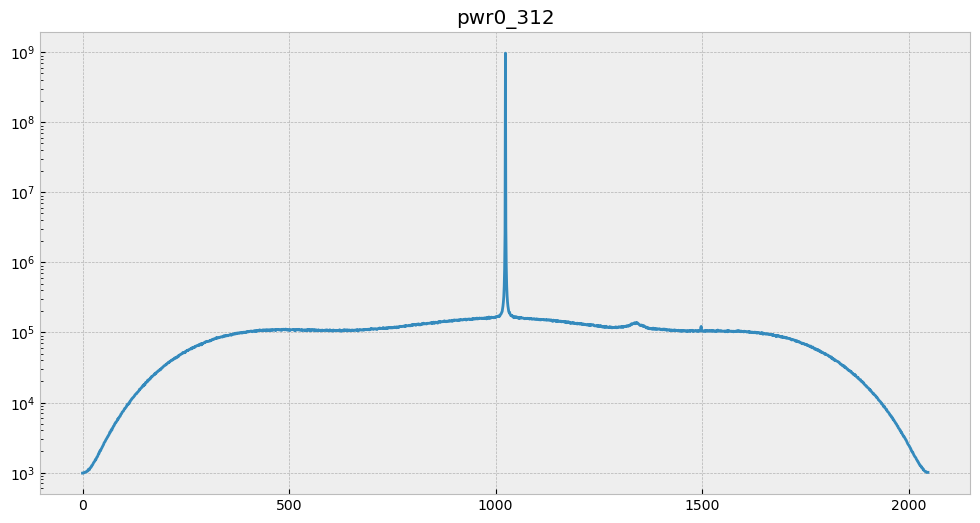

In [11]:
# plotting that shit
plt.figure(figsize=(12, 6))
plt.semilogy(pwr0[10])
plt.title(f'pwr0_{i}')
plt.show()

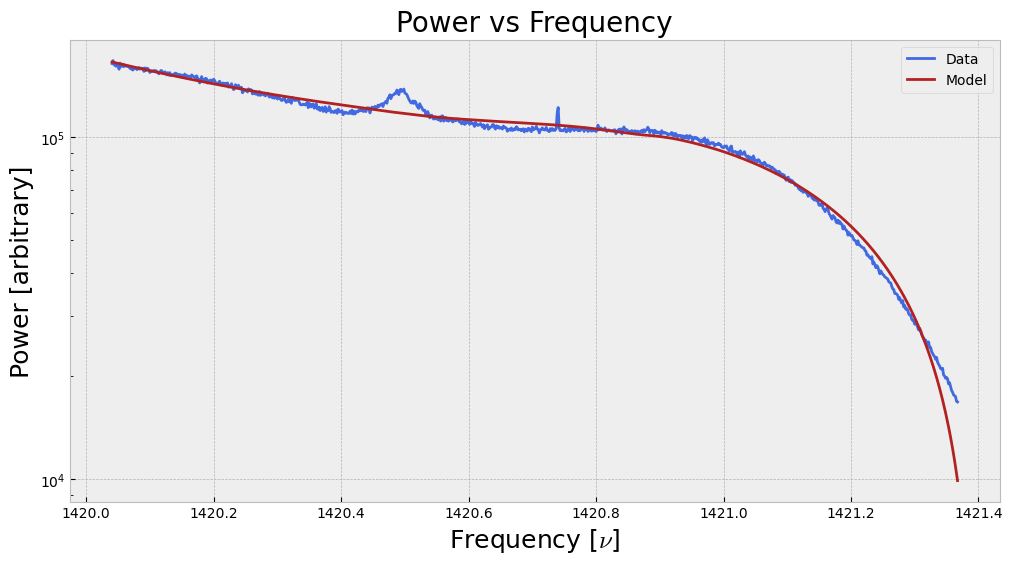

In [12]:
# defining some stuff
model = savgol_filter(pwr0[10], 499, 3) # fitting a model
pwr010_pos = pwr0[10][1050:1900] # observation data
model_pos = savgol_filter(pwr010_pos, 500, 3) # model

# plotting!
plt.figure(figsize=(12, 6))
plt.semilogy(freqs[1050:1900], pwr010_pos, label='Data', color='royalblue') # observation data
plt.semilogy(freqs[1050:1900], model_pos, label='Model', color='firebrick') # model
plt.title('Power vs Frequency', fontsize=20) # gives it a sick title
plt.xlabel(r'Frequency [$\nu$]', fontsize=18)
plt.ylabel(r'Power [arbitrary]', fontsize=18)
plt.legend()
plt.show()

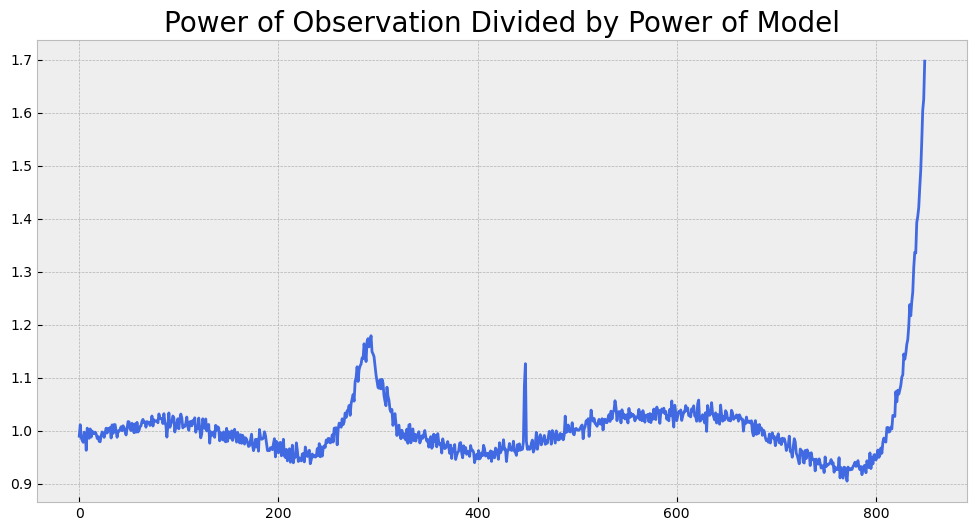

In [13]:
divided = pwr010_pos/model_pos # another defined variable

# plotting!
plt.figure(figsize=(12, 6))
plt.plot(divided, label='Data', color='royalblue') # observation data
plt.title('Power of Observation Divided by Power of Model', fontsize=20) # gives it a sick title
plt.show()

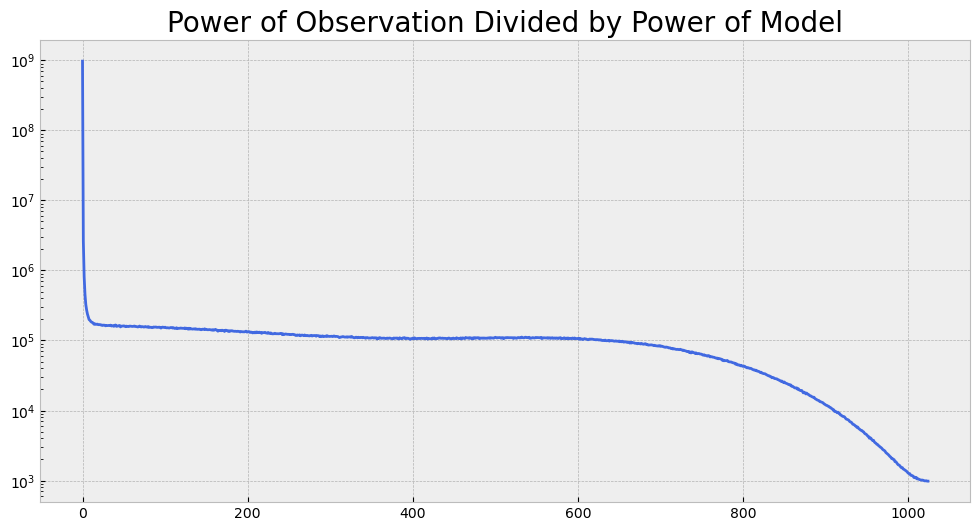

In [14]:
# variables to take half of set and flip it
switch_set = pwr0[10][0:1025]
switch_index = np.arange(0, 1025, 1)
switched = np.flip(switch_set)

# plotting
plt.figure(figsize=(12, 6))
plt.semilogy(switched, label='Data', color='royalblue') # observation data
plt.title('Power of Observation Divided by Power of Model', fontsize=20) # gives it a sick title
plt.show()

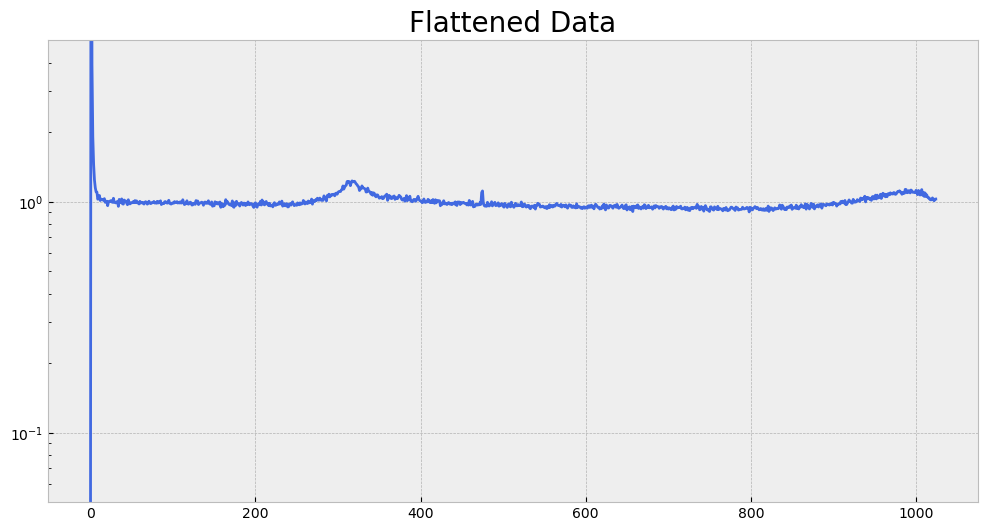

In [15]:
# flattens the data
pwr0_flat = pwr0[10][1023:2048]/switched

# plotting
plt.figure(figsize=(12, 6))
plt.semilogy(pwr0_flat, label='Data', color='royalblue') # observation data
plt.ylim(5e-2, 0.5e1)
plt.title('Flattened Data', fontsize=20) # gives it a sick title
plt.show()

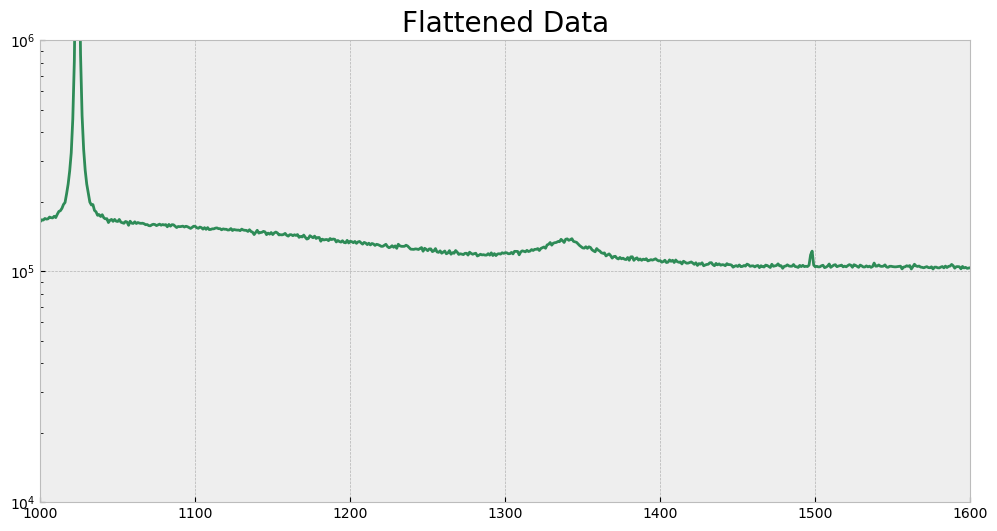

In [16]:
# flatten... again?
new_flat = pwr0[10].flatten()

# plotting
plt.figure(figsize=(12, 6))
plt.semilogy(new_flat, color='seagreen')
plt.xlim(1000, 1600)
plt.ylim(1e4, 1e6)
plt.title('Flattened Data', fontsize=20) # gives it a sick title
plt.show()

In [17]:
# flattens the index
flatter = np.arange(1023, 2048, 1)
print('Length of flattened index:', len(flatter)) 


Length of flattened index: 1025


In [18]:
divided0 = [] 
chunked0 = []
for i in range(len(pwr0)):
    spectra = pwr0[i]
    switch_set = spectra[0:1024] 
    switched = np.flip(switch_set)
    flatter = spectra[1024:2048]/switched
    chunked = flatter[5:600]
    divided0.append(flatter)
    chunked0.append(chunked)

divided1 = []
chunked1 = []
for i in range(len(pwr1)):
    spectra = pwr1[i]
    switch_set = spectra[0:1024] 
    switched = np.flip(switch_set)
    flatter = spectra[1024:2048]/switched
    chunked = flatter[50:600]
    divided1.append(flatter)
    chunked1.append(chunked)
    
d0 = len(divided0[0])
c0 = len(chunked0[0])
d1 = len(divided1[0])
c1 = len(chunked1[0])

print('Length of divided0, chunked0, divided1, and chunked1:', d0,'|', c0, '|', d1, '|', c1, 'in that order.')

Length of divided0, chunked0, divided1, and chunked1: 1024 | 595 | 1024 | 550 in that order.


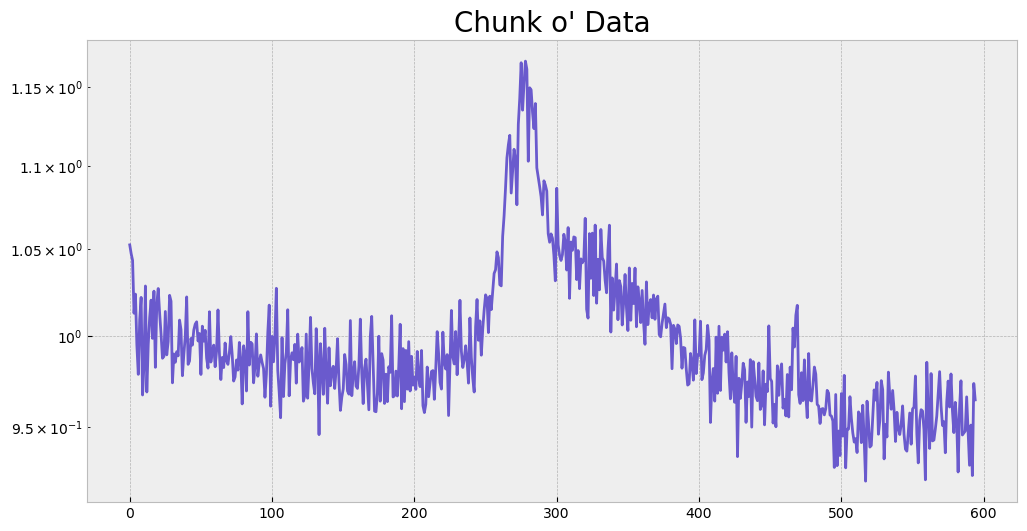

In [19]:
# plotting
plt.figure(figsize=(12, 6))
plt.semilogy(chunked0[30], color='slateblue')
plt.title("Chunk o' Data", fontsize=20) # gives it a sick title
plt.show()

In [20]:
the300 = np.load('/Users/rrrod/FFC_4/data/obs_042424/Phase2/spec323_L120_B20.npz', allow_pickle=True)

print(the300['missed'])


{1: [51.53828711063656, 1.1991023186681529], 2: [62.08904253931914, 4.403520617876413], 4: [48.172171767721366, 1.8413168937712994], 12: [44.8338517354441, 2.2868666723494537], 46: [41.678166935480085, 2.452720593232178], 149: [39.13757190290301, 3.1899928026737085]}


In [21]:
table

Unnamed: 0      L     B          RA        DEC  Galactic_Index
0             0  124.4  20.0   23.851192  82.746098             168
1             1  124.4  23.4   32.778248  86.042542             169
2             2  129.0  20.0   52.084066  80.962227             180
3             3  133.6  20.0   69.006710  77.908980             192
4             4  129.0  23.4   69.993942  83.367395             181
..          ...    ...   ...         ...        ...             ...
319         319  115.2  23.4  309.232324  82.078465             145
320         320  110.6  20.0  312.501293  76.649154             132
321         321  115.2  20.0  326.412516  79.953801             144
322         322  119.8  23.4  334.954938  85.318438             157
323         323  119.8  20.0  350.278198  82.316496             156

[324 rows x 6 columns]

In [22]:
len_gal = len(galactic)
print('Number of noise files imported:', len_gal) # confirms all files are loaded
print()
galactic # lists all files loaded


Number of noise files imported: 313



[[60.0, 20.0],
 [60.0, 23.4],
 [60.0, 26.8],
 [60.0, 30.2],
 [60.0, 33.599999999999994],
 [60.0, 36.99999999999999],
 [60.0, 40.39999999999999],
 [60.0, 43.79999999999999],
 [60.0, 47.19999999999999],
 [60.0, 50.59999999999999],
 [60.0, 53.99999999999999],
 [60.0, 57.399999999999984],
 [64.6, 20.0],
 [64.6, 23.4],
 [64.6, 26.8],
 [64.6, 30.2],
 [64.6, 33.599999999999994],
 [64.6, 36.99999999999999],
 [64.6, 40.39999999999999],
 [64.6, 43.79999999999999],
 [64.6, 47.19999999999999],
 [64.6, 50.59999999999999],
 [64.6, 53.99999999999999],
 [64.6, 57.399999999999984],
 [69.19999999999999, 20.0],
 [69.19999999999999, 23.4],
 [69.19999999999999, 26.8],
 [69.19999999999999, 30.2],
 [69.19999999999999, 33.599999999999994],
 [69.19999999999999, 36.99999999999999],
 [69.19999999999999, 40.39999999999999],
 [69.19999999999999, 43.79999999999999],
 [69.19999999999999, 47.19999999999999],
 [69.19999999999999, 50.59999999999999],
 [69.19999999999999, 53.99999999999999],
 [69.19999999999999, 57.3999

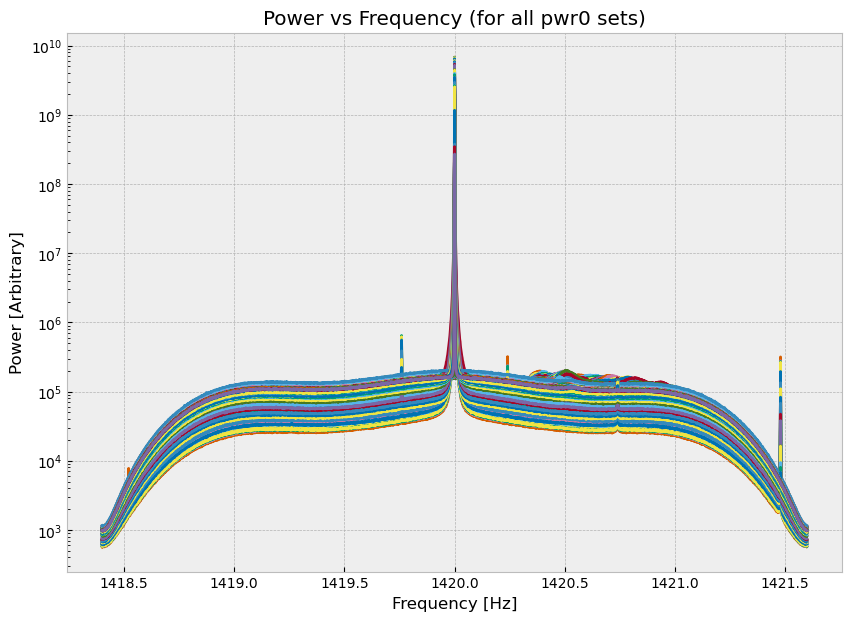

In [23]:
'''
“In the middle of the journey of our life I found myself 
within a dark woods where the straight way was lost.”
                                    - Dante's Inferno
'''
plt.figure(figsize = (10, 7))
for i in range(len(pwr0)):
    plt.semilogy(freqs, pwr0[i])
plt.title('Power vs Frequency (for all pwr0 sets)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power [Arbitrary]')
plt.show()

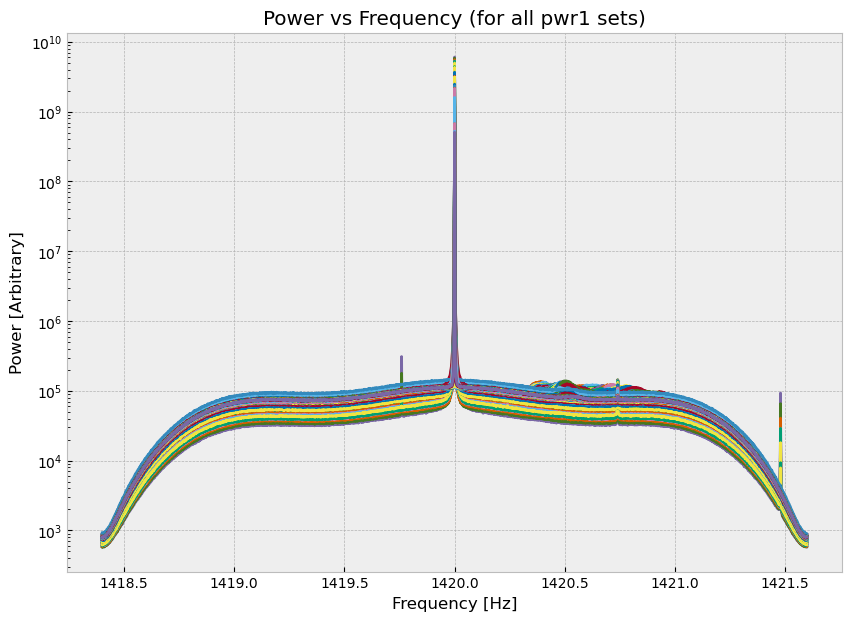

In [24]:
''' 
"Leave all hope, ye who enter here!"
                - Dante's Inferno
'''
plt.figure(figsize = (10, 7))
for i in range(len(pwr1)):
    plt.semilogy(freqs, pwr1[i])
plt.title('Power vs Frequency (for all pwr1 sets)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power [Arbitrary]')
plt.show()

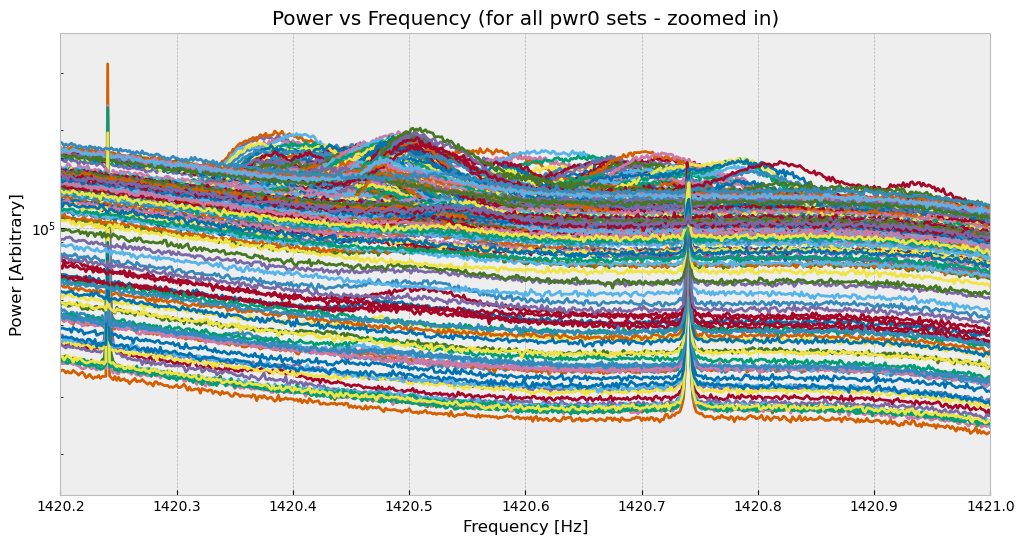

In [25]:
''' 
"Thence we came forth to rebehold the stars."
                        - Dante's Inferno
'''
plt.figure(figsize = (12, 6))
for i in range(len(pwr0)):
    plt.semilogy(freqs, pwr0[i])
plt.title('Power vs Frequency (for all pwr0 sets - zoomed in)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power [Arbitrary]')
plt.xlim(1420.2, 1421)
plt.ylim(1.5e4, 4e5)
plt.show()


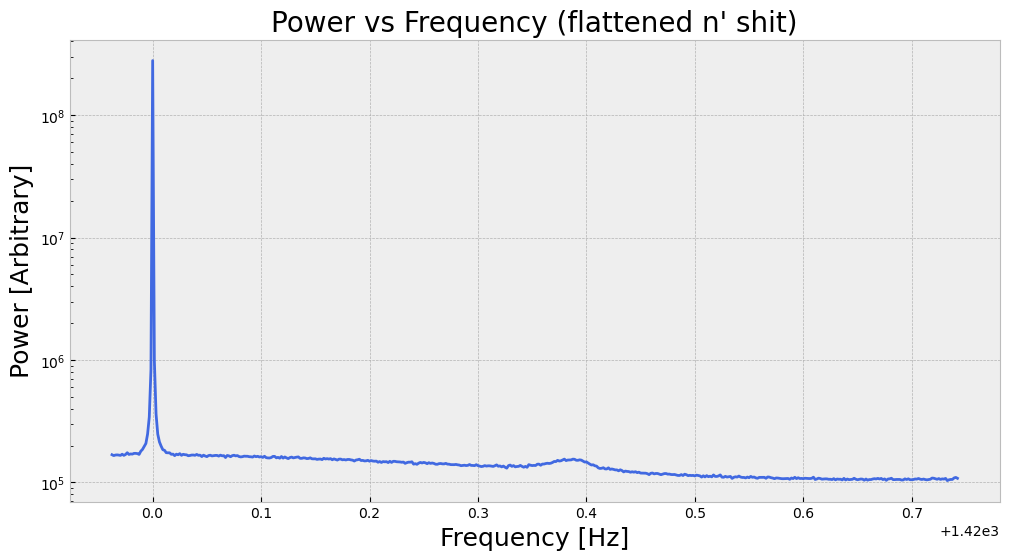

In [26]:
freqs2 = freqs[1000:1500]

plt.figure(figsize = (12, 6))
plt.semilogy(freqs2, pwr0[0][1000:1500], color='royalblue')
plt.title("Power vs Frequency (flattened n' shit)", fontsize=20)
plt.xlabel('Frequency [Hz]', fontsize=18)
plt.ylabel('Power [Arbitrary]', fontsize=18)
plt.show()



# Beyond here is some bullshit 

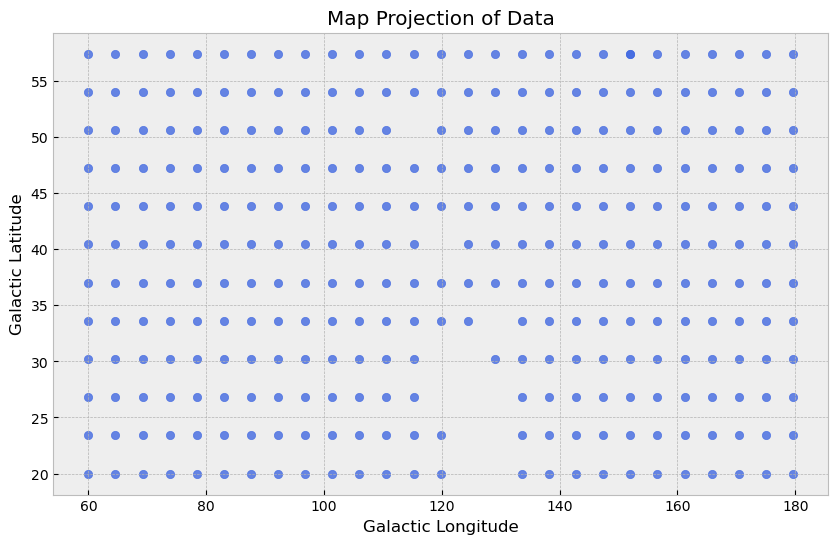

In [27]:
# Extracting galactic coordinates
galactic_longitudes = [coord[0] for coord in galactic]
galactic_latitudes = [coord[1] for coord in galactic]

# Plotting the map projection
plt.figure(figsize=(10, 6))
plt.scatter(galactic_longitudes, galactic_latitudes, c='royalblue', marker='o', alpha=0.8)
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')
plt.title('Map Projection of Data')
plt.grid(True)
plt.show()


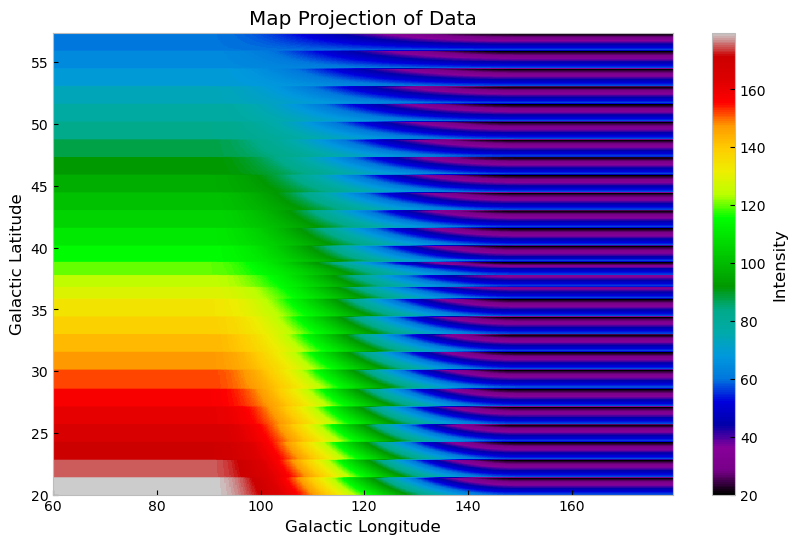

In [28]:
data = np.array(galactic)

# plots the map projection
plt.figure(figsize=(10, 6))
plt.imshow(data, extent=[min(galactic_longitudes), max(galactic_longitudes), min(galactic_latitudes), max(galactic_latitudes)], aspect='auto', cmap='nipy_spectral')
plt.colorbar(label='Intensity')
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')
plt.title('Map Projection of Data')
plt.grid(False)
plt.show()


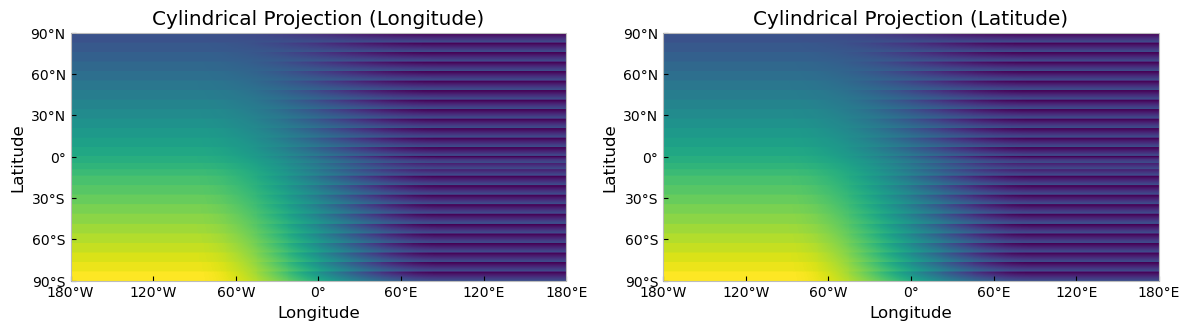

In [29]:
# Assuming you have longitude and latitude arrays
NLON, NLAT = len(galactic[0]), len(galactic)  # Number of pixels in longitude and latitude
xs, ys = np.indices((NLAT, NLON))  # Get the array indices for each pixel
lats = (xs - NLAT/2) * 180 / NLAT  # Scale [0:NLAT) to [-90:90)
lons = (ys - NLON/2) * 360 / NLON  # Scale [0:NLON) to [-180:180)

# Replace this with your actual data
data_longitude = np.array(galactic)
data_latitude = np.array(galactic)

# Create Cartopy projections
projection = ccrs.PlateCarree()

# Create a new figure and axis for each plot
plt.figure(figsize=(12, 6))

# Plot cylindrical projection (longitude)
ax1 = plt.subplot(1, 2, 1, projection=projection)
ax1.set_title('Cylindrical Projection (Longitude)')
img_longitude = ax1.imshow(data_longitude, extent=(-180, 180, -90, 90), transform=ccrs.PlateCarree(), cmap='viridis')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax1.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
ax1.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax1.yaxis.set_major_formatter(LATITUDE_FORMATTER)
ax1.grid()

# Plot cylindrical projection (latitude)
ax2 = plt.subplot(1, 2, 2, projection=projection)
ax2.set_title('Cylindrical Projection (Latitude)')
img_latitude = ax2.imshow(data_latitude, extent=(-180, 180, -90, 90), transform=ccrs.PlateCarree(), cmap='viridis')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax2.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
ax2.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax2.yaxis.set_major_formatter(LATITUDE_FORMATTER)
ax2.grid(False)

plt.tight_layout()
plt.show()


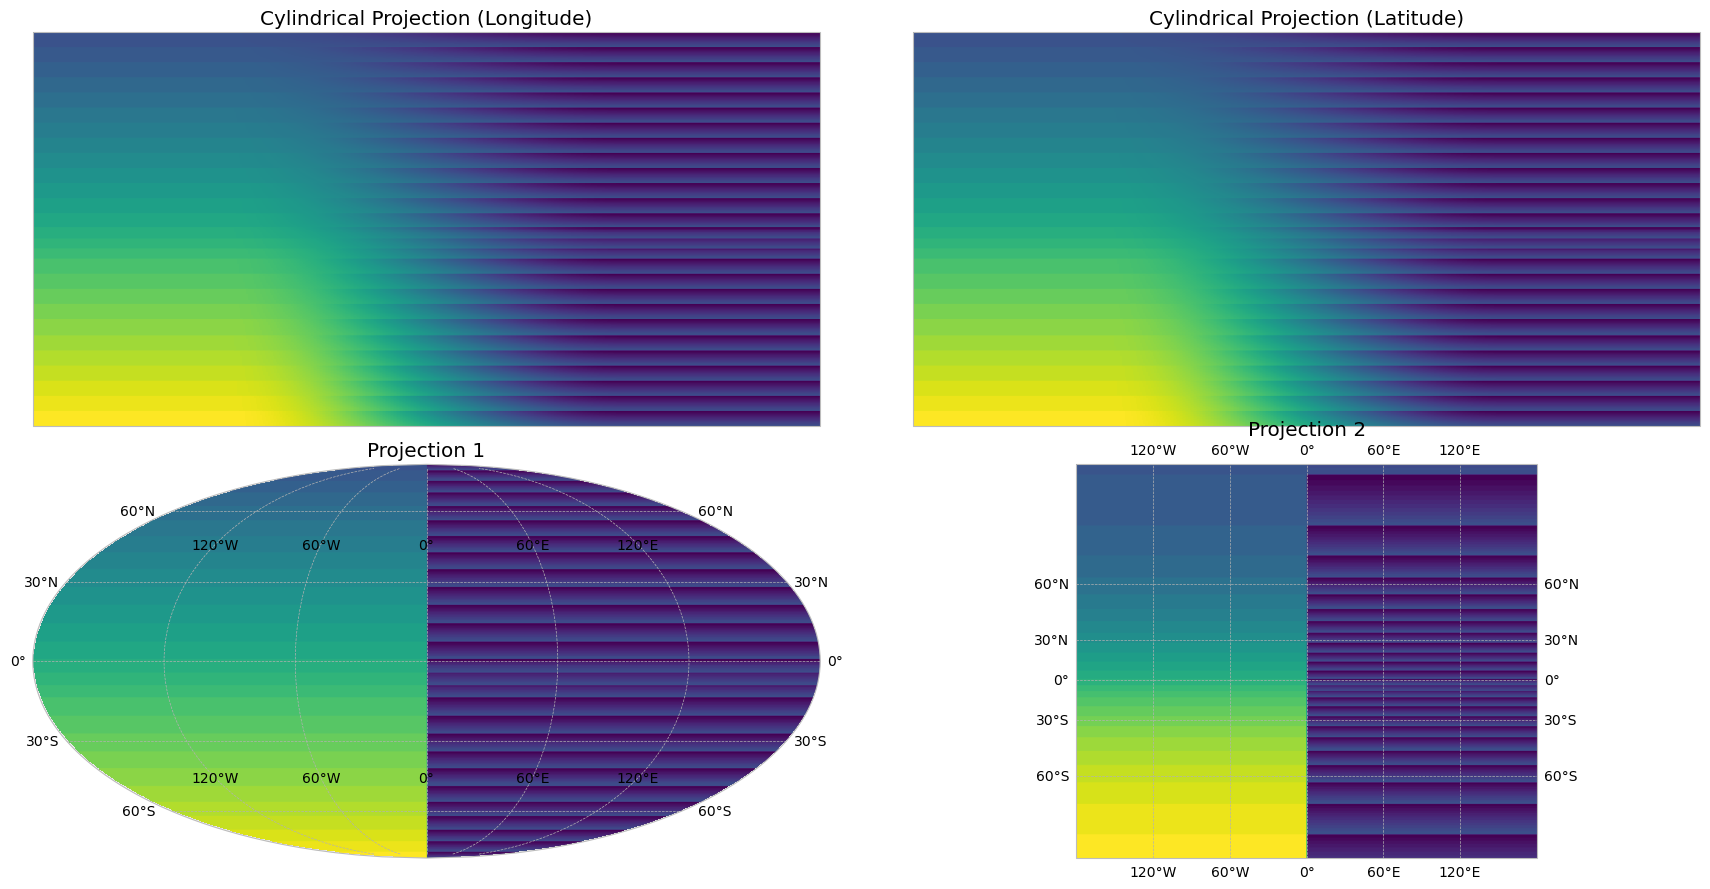

In [30]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

# Assuming you have longitude and latitude arrays
NLON, NLAT = len(galactic[0]), len(galactic)  # Number of pixels in longitude and latitude
xs, ys = np.indices((NLAT, NLON))  # Get the array indices for each pixel
lats = (xs - NLAT/2) * 180 / NLAT  # Scale [0:NLAT) to [-90:90)
lons = (ys - NLON/2) * 360 / NLON  # Scale [0:NLON) to [-180:180)

# Replace this with your actual data
data_longitude = np.array(galactic)
data_latitude = np.array(galactic)

# Create Cartopy projections
projection = ccrs.PlateCarree()

# Create a new figure and axis for each plot
plt.figure(figsize=(18, 9))

# Plot cylindrical projection (longitude)
ax1 = plt.subplot(2, 2, 1, projection=projection)
ax1.set_title('Cylindrical Projection (Longitude)')
img_longitude = ax1.imshow(data_longitude, extent=(-180, 180, -90, 90), transform=ccrs.PlateCarree(), cmap='viridis')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.grid()

# Plot cylindrical projection (latitude)
ax2 = plt.subplot(2, 2, 2, projection=projection)
ax2.set_title('Cylindrical Projection (Latitude)')
img_latitude = ax2.imshow(data_latitude, extent=(-180, 180, -90, 90), transform=ccrs.PlateCarree(), cmap='viridis')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.grid(False)

# Plot additional projections
projections = [ccrs.Mollweide(), ccrs.Mercator()]

for i, proj in enumerate(projections, start=3):
    ax = plt.subplot(2, 2, i, projection=proj)
    ax.set_title(f'Projection {i-2}')
    ax.imshow(data_longitude, extent=(-180, 180, -90, 90), transform=ccrs.PlateCarree(), cmap='viridis')
    ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--')

plt.tight_layout()
plt.show()


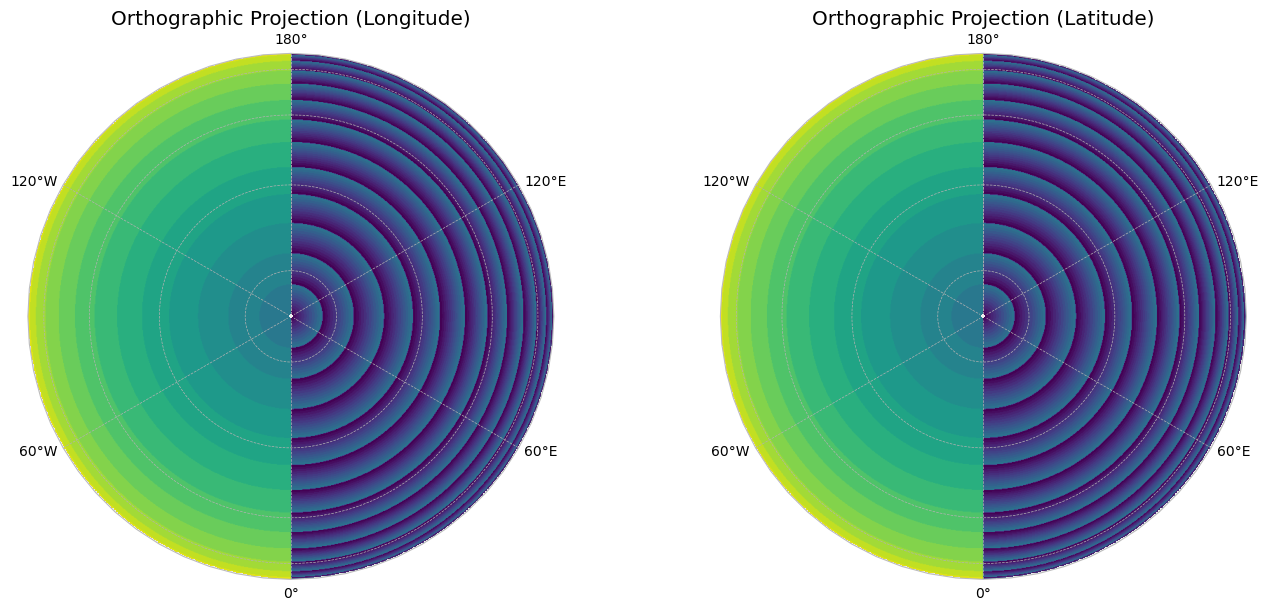

In [31]:
# Assuming you have longitude and latitude arrays
NLON, NLAT = len(galactic[0]), len(galactic)  # Number of pixels in longitude and latitude
xs, ys = np.indices((NLAT, NLON))  # Get the array indices for each pixel
lats = (xs - NLAT/2) * 180 / NLAT  # Scale [0:NLAT) to [-90:90)
lons = (ys - NLON/2) * 360 / NLON  # Scale [0:NLON) to [-180:180)

# Replace this with your actual data
data_longitude = np.array(galactic)
data_latitude = np.array(galactic)

# Create Cartopy projections
projection = ccrs.Orthographic(central_latitude=90)
data_crs = ccrs.PlateCarree()

# Create a new figure and axis for each plot
fig, axes = plt.subplots(ncols=2, figsize=(14, 6), subplot_kw={'projection': projection})

# Plot orthographic projection (longitude)
axes[0].set_title('Orthographic Projection (Longitude)')
img_longitude = axes[0].imshow(data_longitude, extent=(-180, 180, -90, 90), transform=data_crs, cmap='viridis')
axes[0].gridlines(crs=data_crs, draw_labels=True, linestyle='--')

# Plot orthographic projection (latitude)
axes[1].set_title('Orthographic Projection (Latitude)')
img_latitude = axes[1].imshow(data_latitude, extent=(-180, 180, -90, 90), transform=data_crs, cmap='viridis')
axes[1].gridlines(crs=data_crs, draw_labels=True, linestyle='--')

plt.tight_layout()
plt.show()


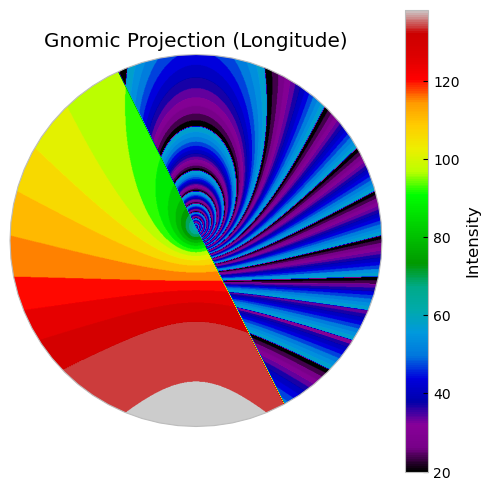

In [40]:
# Assuming you have longitude and latitude arrays
NLON, NLAT = len(galactic[0]), len(galactic)  # Number of pixels in longitude and latitude
xs, ys = np.indices((NLAT, NLON))  # Get the array indices for each pixel
lats = (xs - NLAT/2) * 180 / NLAT  # Scale [0:NLAT) to [-90:90)
lons = (ys - NLON/2) * 360 / NLON  # Scale [0:NLON) to [-180:180)

# Replace this with your actual data
data_longitude = np.array(galactic)
data_latitude = np.array(galactic)

# Create Cartopy projection
projection = ccrs.Gnomonic(central_latitude=60, central_longitude=-30)

# Create a new figure and axis
fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection=projection)

# Plot the Gnomonic projection
ax.set_title('Gnomic Projection (Longitude)')

img = ax.imshow(data_longitude, extent=(-180, 180, -90, 90), transform=ccrs.PlateCarree(), cmap='nipy_spectral')

plt.colorbar(img, orientation='vertical', label='Intensity')

plt.show()


     

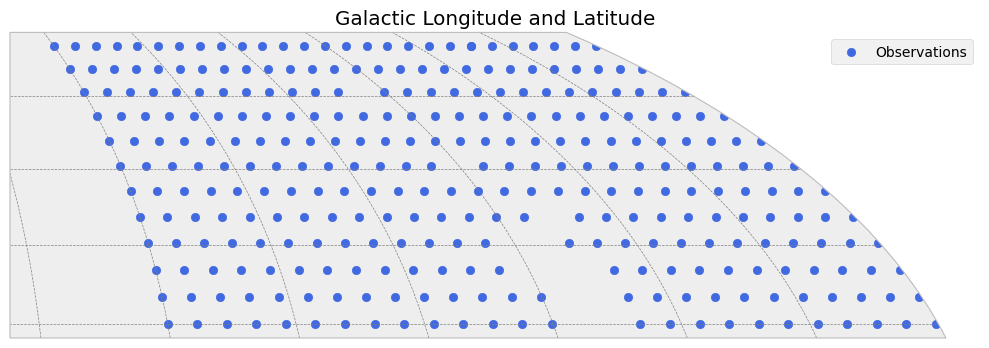

In [38]:
# Defines 'galactic' -- which is a list of [longitude, latitude] pairs
galactic = [[lon, lat] for lon, lat in zip(galactic_longitudes, galactic_latitudes)]

# Converts list of coordinates into numpy arrays for easier manipulation
galactic_np = np.array(galactic)
lons, lats = galactic_np[:, 0], galactic_np[:, 1]

# Creates a scatter plot on a geographic projection
plt.figure(figsize=(10, 5))
plt.subplot(1, 1, 1, projection=ccrs.Mollweide())

# Sets title and labels for axes
plt.title('Galactic Longitude and Latitude')
#plt.gca().set_global()  # Optionally set a global view

# Plots the data!
plt.scatter(lons, lats, transform=ccrs.Geodetic(), c='royalblue', label='Observations')

# Adds grid lines and customizes their appearance
plt.gca().gridlines(color='gray', linestyle='--', linewidth=0.5)

plt.legend(loc='upper right') # legendary
plt.tight_layout()
plt.show() # gimme a show


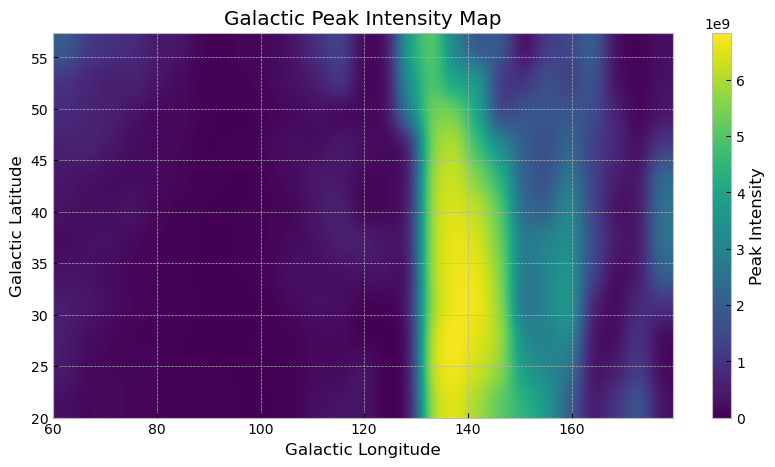

In [35]:
# reloads in files
pwr0 = [np.load(file)['data0'] for file in files]
galactic = [(np.load(file)['coords'][1], np.load(file)['coords'][2]) for file in files]

# extracts peak intensities (assuming pwr0 contains relevant data, lol)
peak_intensities = [np.max(spectrum) for spectrum in pwr0]

# sorts and structures galactic coordinates
longitudes = sorted(set(coord[0] for coord in galactic))
latitudes = sorted(set(coord[1] for coord in galactic), reverse=True)  # Reverse to align with image coordinate system

# creates a grid of peak intensities
intensity_grid = np.zeros((len(latitudes), len(longitudes)))
for intensity, (lon, lat) in zip(peak_intensities, galactic):
    lat_idx = latitudes.index(lat)
    lon_idx = longitudes.index(lon)
    intensity_grid[lat_idx, lon_idx] = intensity

# plots it up!
plt.figure(figsize=(10, 5))
plt.imshow(intensity_grid, cmap='viridis', extent=[min(longitudes), max(longitudes), min(latitudes), max(latitudes)], aspect='auto', interpolation='gaussian')
plt.colorbar(label='Peak Intensity')
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')
plt.title('Galactic Peak Intensity Map')
plt.show()


In [36]:
from ugradio import doppler

def flip_divide(spectra):
    switch_set = spectra[0:1024] 
    switched = np.flip(switch_set)
    flatter = spectra[1024:2048]/switched
    chunked = flatter[5:600]
    return flatter, chunked, switched

#len(freqs)

divided0 = [] 
chunked0 = []
freqs_chunked0 = []
for i in range(len(pwr0)):
    spectra = pwr0[i]
    switch_set = spectra[0:1024] 
    switched = np.flip(switch_set)
    flatter = spectra[1024:2048]/switched
    chunked = flatter[5:600]
    freq_divided = freqs[1024:2048]
    freq_chunked_axis = freq_divided[5:600]
    divided0.append(flatter)
    chunked0.append(chunked)
    freqs_chunked0.append(freq_chunked_axis)


divided1 = []
chunked1 = []
freqs_chunked1 = []
for i in range(len(pwr1)):
    spectra = pwr1[i]
    switch_set = spectra[0:1024] 
    switched = np.flip(switch_set)
    flatter = spectra[1024:2048]/switched
    chunked = flatter[50:600]
    freq_divided = freqs[1024:2048]
    freq_chunked_axis = freq_divided[5:600]
    divided1.append(flatter)
    chunked1.append(chunked)
    freqs_chunked1.append(freq_chunked_axis)

No module named 'rtlsdr'


In [ ]:
ind = []
freq_peak = []
freq_divided = freqs[1024:2048]
freq_chunked = freq_divided[5:600]


for i in range(len(chunked0)):
    if 0 < i < 180 & 223 < i < 312:
        index = np.nanargmax(chunked0[i])
        ind.append(index)
        freq_peak.append(freq_chunked[index])
    else: 
        special_chunk = chunked0[i][200:450]
        freq_special = freq_chunked[200:450]
        index_special = np.nanargmax(special_chunk)
        ind.append(index_special)
        freq_peak.append(freq_special[index_special])

freq_arr = np.array(freq_peak)

freq_arr

array([1420.5296875, 1420.38125  , 1420.4734375, 1420.54375  ,
       1420.403125 , 1420.3296875, 1420.446875 , 1420.559375 ,
       1420.5953125, 1420.61875  , 1420.496875 , 1420.5      ,
       1420.4015625, 1420.49375  , 1420.375    , 1420.36875  ,
       1420.6765625, 1420.58125  , 1420.3921875, 1420.696875 ,
       1420.6296875, 1420.625    , 1420.38125  , 1420.6015625,
       1420.3265625, 1420.4171875, 1420.3484375, 1420.68125  ,
       1420.5921875, 1420.340625 , 1420.5375   , 1420.5125   ,
       1420.6375   , 1420.3609375, 1420.534375 , 1420.346875 ,
       1420.5609375, 1420.5296875, 1420.321875 , 1420.434375 ,
       1420.403125 , 1420.55625  , 1420.4234375, 1420.6984375,
       1420.340625 , 1420.3265625, 1420.678125 , 1420.3671875,
       1420.425    , 1420.4078125, 1420.3890625, 1420.41875  ,
       1420.5015625, 1420.3296875, 1420.365625 , 1420.6203125,
       1420.471875 , 1420.5328125, 1420.428125 , 1420.5171875,
       1420.5921875, 1420.571875 , 1420.471875 , 1420.3

In [ ]:
c = 299792458

velocity_peak = []
v_uncorrected = []
velocity_reversed = []
freqs_dopp = []
velocity_peak_kms = []

for i in range(len(freq_arr)):
    RA = coordinates[i][3]
    DEC = coordinates[i][4]
    jd_i = jd[i]
    LSR_target_vel = doppler.get_projected_velocity(ra=RA, dec=DEC, jd=jd_i)
    nu = 1420
    delta_nu = freq_arr[i] - nu
    v = -(delta_nu / nu) * c
    dopp_v = v - LSR_target_vel
    freqs_corrected = ((c + (LSR_target_vel)) / c) * freq_arr[i]
    freqs_dopp.append(freqs_corrected)
    v_uncorrected.append(v)
    velocity_peak.append(dopp_v)
    velocity_peak_kms.append(dopp_v / 1000)
    # Store reversed velocity
    velocity_reversed.append(dopp_v * (-1))

dopp_v*(-1)

89340.61129315403

In [ ]:
velocity_reversed

[126598.50844137985,
 94005.33261542088,
 112166.53518431673,
 125665.4615082459,
 94592.3887216459,
 77670.13852454188,
 100963.11009031178,
 123242.46852153548,
 129338.86920346438,
 132783.01049818064,
 105541.27185536402,
 104685.87976662199,
 98371.57312248285,
 116607.49793785517,
 90265.87816669591,
 87636.74964712419,
 151278.07802448416,
 129779.97639933445,
 88463.59038887454,
 151367.72331736912,
 135745.67452996326,
 133307.98010550323,
 80394.5493475844,
 125453.2642236644,
 81240.50190486602,
 99177.92033254563,
 83426.62175060554,
 152420.33717258315,
 132315.78507212066,
 77877.12306149841,
 118091.59791940018,
 111446.97415846474,
 136458.00151519195,
 76683.40916110345,
 111911.65331160775,
 70939.86296642106,
 129314.81487636492,
 121554.61575400541,
 76482.58256960812,
 99005.95263439867,
 91153.15666785228,
 122204.07702564489,
 92870.4725270235,
 149621.7744084674,
 72763.77345273226,
 68475.76093261025,
 141379.58807838862,
 74420.8832079739,
 99106.41470558071,


In [ ]:
velocity_peak

[-126598.50844137985,
 -94005.33261542088,
 -112166.53518431673,
 -125665.4615082459,
 -94592.3887216459,
 -77670.13852454188,
 -100963.11009031178,
 -123242.46852153548,
 -129338.86920346438,
 -132783.01049818064,
 -105541.27185536402,
 -104685.87976662199,
 -98371.57312248285,
 -116607.49793785517,
 -90265.87816669591,
 -87636.74964712419,
 -151278.07802448416,
 -129779.97639933445,
 -88463.59038887454,
 -151367.72331736912,
 -135745.67452996326,
 -133307.98010550323,
 -80394.5493475844,
 -125453.2642236644,
 -81240.50190486602,
 -99177.92033254563,
 -83426.62175060554,
 -152420.33717258315,
 -132315.78507212066,
 -77877.12306149841,
 -118091.59791940018,
 -111446.97415846474,
 -136458.00151519195,
 -76683.40916110345,
 -111911.65331160775,
 -70939.86296642106,
 -129314.81487636492,
 -121554.61575400541,
 -76482.58256960812,
 -99005.95263439867,
 -91153.15666785228,
 -122204.07702564489,
 -92870.4725270235,
 -149621.7744084674,
 -72763.77345273226,
 -68475.76093261025,
 -141379.58807

In [ ]:
min_v = min(velocity_peak)
print('Minimum Velocity Peak:', min_v)
print()
max_v = max(velocity_peak)
print('Maximum Velocity Peak:', max_v)
print()

Minimum Velocity Peak: -152420.33717258315

Maximum Velocity Peak: -45267.1556237459



In [ ]:
neg_velocities = []
pos_velocities = []

for i in range(len(velocity_peak)):
    if velocity_peak[i] < 0: 
        neg_velocities.append(velocity_peak[i])
    else: 
        pos_velocities.append(velocity_peak[i])

neg_v = len(neg_velocities)
print(neg_v)
pos_v = len(pos_velocities) 
print(pos_v)

313
0


In [ ]:

L_array2 = np.linspace(60, 180, 30)
B_array2 = np.linspace(20, 60, 14)

ll2, bb2 = np.meshgrid(L_array2, B_array2)


lb_val2  = []
indexes2 = []


for i in range(len(ll2[:,0])):
    for j in range(len(bb2[0,:])):
        
        #HOLDING THE ROW INDEX
        row = i
        #HOLDS THE COLUMN INDEX
        column = j
        
        #HOLDS THE INDEX IN A LIST
        index = [i,j]
        
        #APPENDING THE VALUE FOR LL AND BB INTO THE [L,B] GALACTIC COORDINATES
        lb_val2.append([ll2[i,j], bb2[i,j]])
        indexes2.append(index)

#MAKING A MATRIX
matrix2 = np.empty((14, 30, 1))
matrix2[:] = np.nan

#r_img = img[:,:,0]
#g_img = img[:,:,1]
#b_img = img[:,:,2]

l_tolerance = 5
b_tolerance = 4

for i in range(len(velocity_peak)):
    
    l = float(galactic[i][0])
    b = float(galactic[i][1])

    for m in range(len(lb_val2)):
        
        if np.isclose(l, lb_val2[m][0], atol=l_tolerance) and np.isclose(b, lb_val2[m][1], atol=b_tolerance):
            #GETS THE INDEXES
            row_index = indexes2[m][0]
            column_index = indexes2[m][1]

        #GETTING THE CORRESPONDING VELOCITY
            dop = velocity_reversed[i]

            #if dop > 20000: 
            matrix2[row_index, column_index,0] = dop

L_array = np.arange(60, 180, 4)
B_array = np.arange(20, 60, 3)

ll, bb = np.meshgrid(L_array, B_array)
print('row: ', len(bb[:,0]))
print('col: ', len(bb[0,:]))

row:  14
col:  30


In [ ]:
ll, bb

(array([[ 60,  64,  68,  72,  76,  80,  84,  88,  92,  96, 100, 104, 108,
         112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152, 156, 160,
         164, 168, 172, 176],
        [ 60,  64,  68,  72,  76,  80,  84,  88,  92,  96, 100, 104, 108,
         112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152, 156, 160,
         164, 168, 172, 176],
        [ 60,  64,  68,  72,  76,  80,  84,  88,  92,  96, 100, 104, 108,
         112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152, 156, 160,
         164, 168, 172, 176],
        [ 60,  64,  68,  72,  76,  80,  84,  88,  92,  96, 100, 104, 108,
         112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152, 156, 160,
         164, 168, 172, 176],
        [ 60,  64,  68,  72,  76,  80,  84,  88,  92,  96, 100, 104, 108,
         112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152, 156, 160,
         164, 168, 172, 176],
        [ 60,  64,  68,  72,  76,  80,  84,  88,  92,  96, 100, 104, 108,
         112, 116, 120, 124, 128, 13

In [ ]:
'''
• lb_val : holds our galactic coordinates
• indexes: where the index is located in our meshgrid array
'''
lb_val  = []
indexes = []


for i in range(len(ll[:,0])):
    for j in range(len(bb[0,:])):
        
        #HOLDING THE ROW INDEX
        row = i
        #HOLDS THE COLUMN INDEX
        column = j
        
        #HOLDS THE INDEX IN A LIST
        index = [i,j]
        
        #APPENDING THE VALUE FOR LL AND BB INTO THE [L,B] GALACTIC COORDINATES
        lb_val.append([ll[i,j], bb[i,j]])
        indexes.append(index)

float(2.4)

#MAKING A MATRIX
matrix = np.empty((14, 30, 1))
matrix[:] = np.nan

#r_img = img[:,:,0]
#g_img = img[:,:,1]
#b_img = img[:,:,2]

N = 0

l_tolerance = 5.6
b_tolerance = 2.7

for i in range(len(velocity_peak)):
    
    l = float(galactic[i][0])
    b = float(galactic[i][1])

    for m in range(len(lb_val)):
        def find_nearest(array, value):
            array = np.asarray(array)
            idx = (np.abs(array - value)).argmin()
            return idx
        
        if np.isclose(l, lb_val[m][0], atol=l_tolerance) and np.isclose(b, lb_val[m][1], atol=b_tolerance):
            #GETS THE INDEXES
            row_index = indexes[m][0]
            column_index = indexes[m][1]

        #GETTING THE CORRESPONDING VELOCITY
            dop = velocity_peak_kms[i]

            #if dop > 20000: 
            matrix[row_index, column_index,0] = dop
            #else: 
             #   matrix[row_index, column_index, 0] = np.nan

matrix

array([[[ -74.38462419],
        [ -56.49452902],
        [ -56.49452902],
        [ -45.26715562],
        [ -85.26350255],
        [ -85.82157797],
        [ -56.88500829],
        [ -56.34715203],
        [ -68.39888923],
        [ -47.49785102],
        [ -47.49785102],
        [ -64.02063373],
        [ -82.21016389],
        [ -74.55277672],
        [ -79.31467845],
        [ -79.31467845],
        [ -79.31467845],
        [-120.17124724],
        [-120.17124724],
        [-124.74331172],
        [ -92.61229422],
        [ -99.48585314],
        [ -99.48585314],
        [ -99.48585314],
        [ -74.42088321],
        [ -74.42088321],
        [ -94.31916882],
        [ -79.44230006],
        [-110.99971836],
        [-127.42293017]],

       [[ -88.22038583],
        [ -94.47611854],
        [ -94.47611854],
        [ -63.37466049],
        [ -67.50582872],
        [ -52.76710837],
        [ -72.1479025 ],
        [ -72.81571075],
        [ -79.22681134],
        [ -74.21918043]

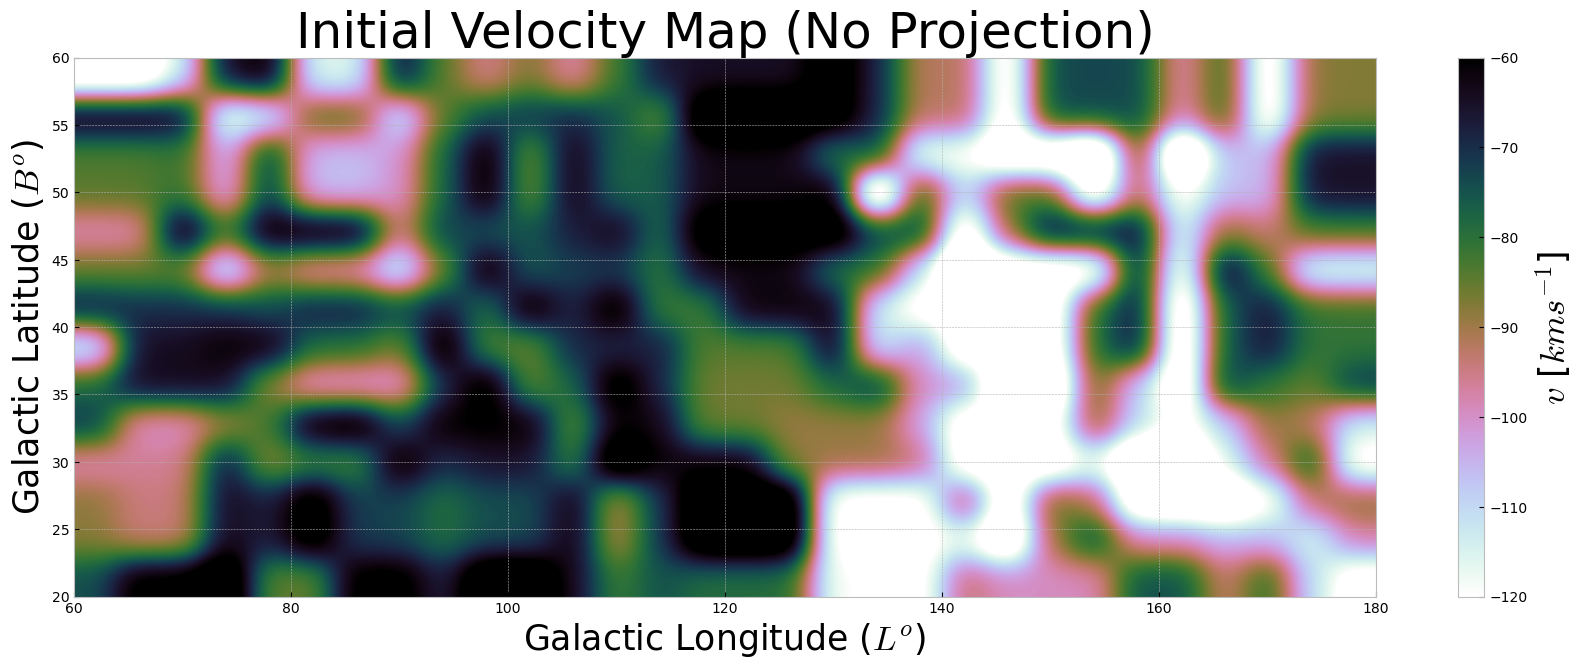

In [ ]:
# colormaps that look good
plt.figure(figsize = (21, 7))
plt.imshow(matrix, cmap = 'cubehelix_r', interpolation= 'gaussian', 
           aspect = 'auto', origin = 'lower', extent=[60, 180, 20, 60], 
           vmin=-120, vmax = -60)
cbar = plt.colorbar()
cbar.set_label(r'$v$ [$kms^{-1}$]', rotation=90, fontsize = 25)
plt.xlabel('Galactic Longitude ($L^{o}$)', fontsize = 25)
plt.ylabel('Galactic Latitude ($B^{o}$)', fontsize = 25)
plt.title('Initial Velocity Map (No Projection)', fontsize=36)
plt.grid(True, lw=0.4, which = 'major')

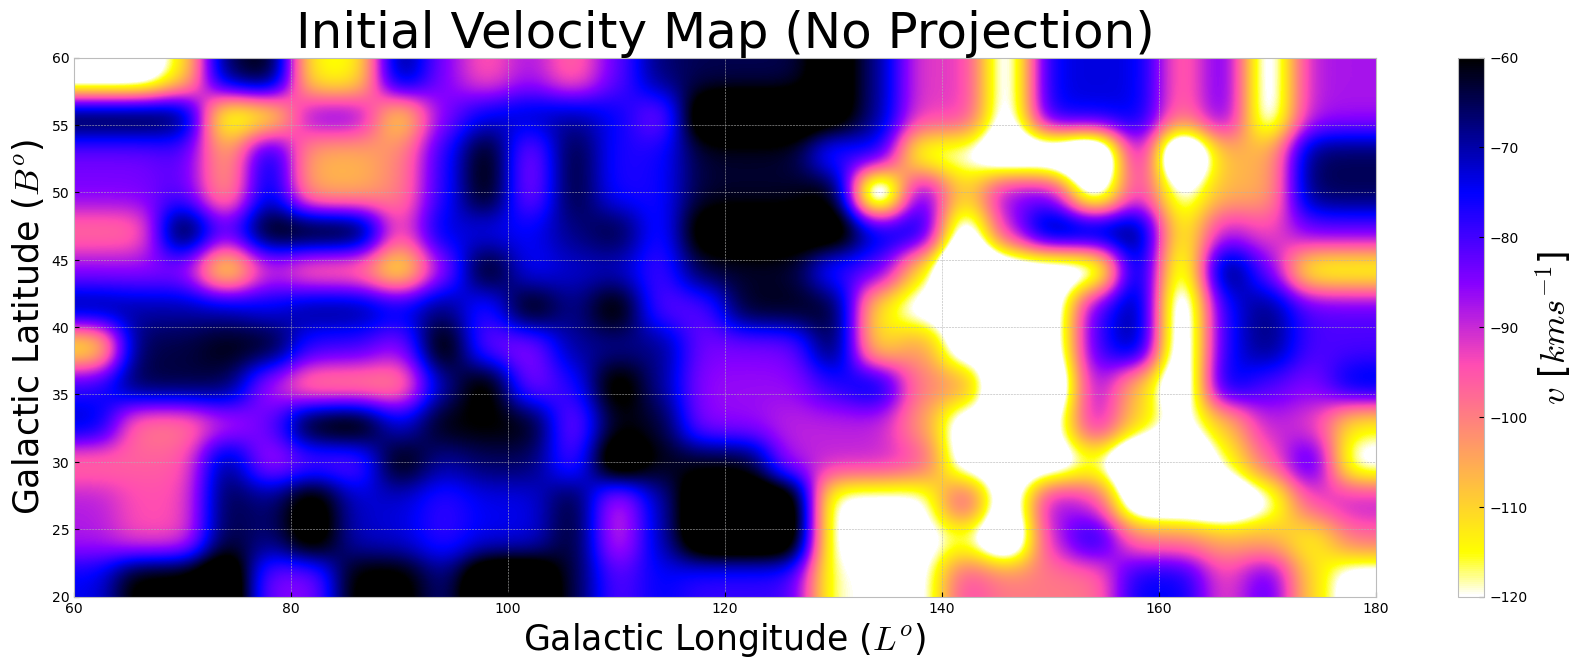

In [ ]:
# colormaps that look good
plt.figure(figsize = (21, 7))
plt.imshow(matrix, cmap = 'gnuplot2_r', interpolation= 'gaussian', 
           aspect = 'auto', origin = 'lower', extent=[60, 180, 20, 60], 
           vmin=-120, vmax = -60)
cbar = plt.colorbar()
cbar.set_label(r'$v$ [$kms^{-1}$]', rotation=90, fontsize = 25)
plt.xlabel('Galactic Longitude ($L^{o}$)', fontsize = 25)
plt.ylabel('Galactic Latitude ($B^{o}$)', fontsize = 25)
plt.title('Initial Velocity Map (No Projection)', fontsize=36)
plt.grid(True, lw=0.4, which = 'major')

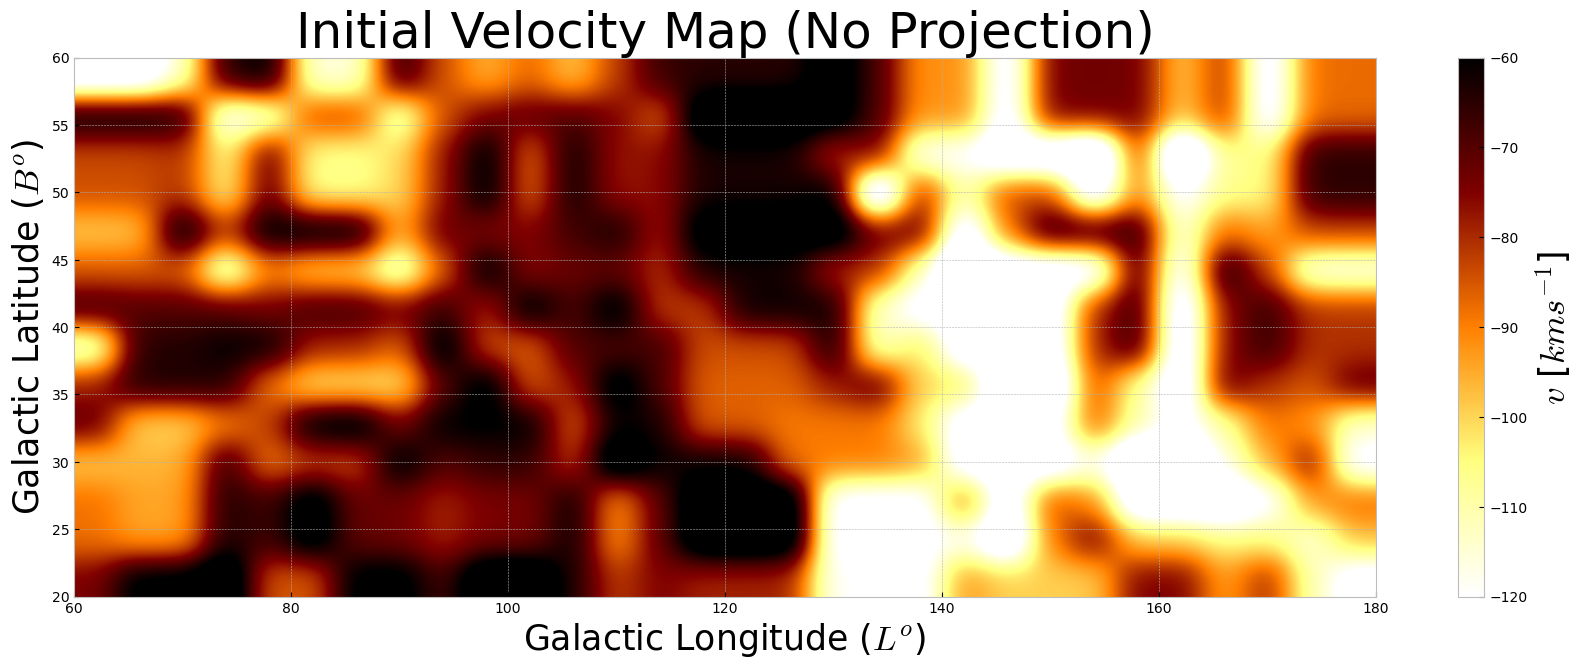

In [ ]:
# colormaps that look good
plt.figure(figsize = (21, 7))
plt.imshow(matrix, cmap = 'afmhot_r', interpolation= 'gaussian', 
           aspect = 'auto', origin = 'lower', extent=[60, 180, 20, 60], 
           vmin=-120, vmax = -60)
cbar = plt.colorbar()
cbar.set_label(r'$v$ [$kms^{-1}$]', rotation=90, fontsize = 25)
plt.xlabel('Galactic Longitude ($L^{o}$)', fontsize = 25)
plt.ylabel('Galactic Latitude ($B^{o}$)', fontsize = 25)
plt.title('Initial Velocity Map (No Projection)', fontsize=36)
plt.grid(True, lw=0.4, which = 'major')

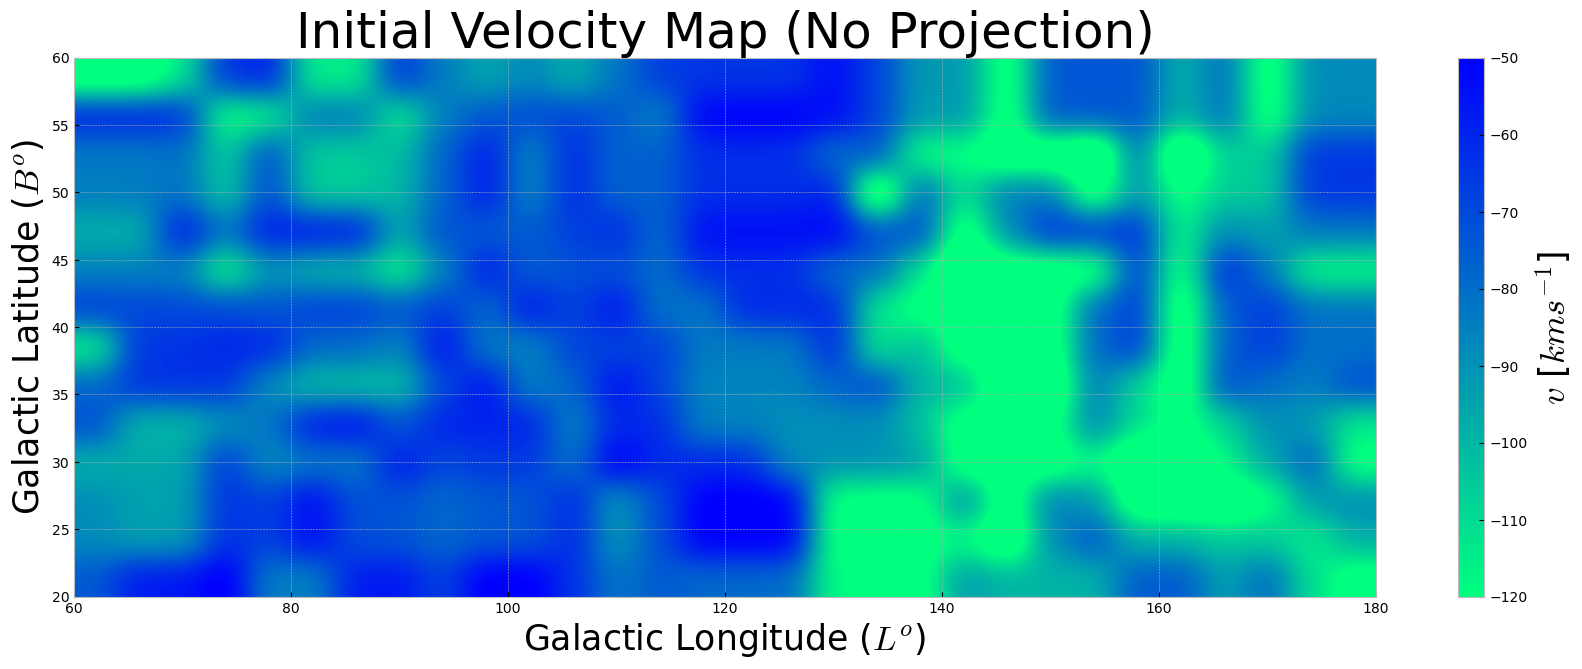

In [ ]:
# colormaps that look good
plt.figure(figsize = (21, 7))
plt.imshow(matrix, cmap = 'winter_r', interpolation= 'gaussian', 
           aspect = 'auto', origin = 'lower', extent=[60, 180, 20, 60], 
           vmin=-120, vmax = -50)
cbar = plt.colorbar()
cbar.set_label(r'$v$ [$kms^{-1}$]', rotation=90, fontsize = 25)
plt.xlabel('Galactic Longitude ($L^{o}$)', fontsize = 25)
plt.ylabel('Galactic Latitude ($B^{o}$)', fontsize = 25)
plt.title('Initial Velocity Map (No Projection)', fontsize=36)
plt.grid(True, lw=0.4, which = 'major')

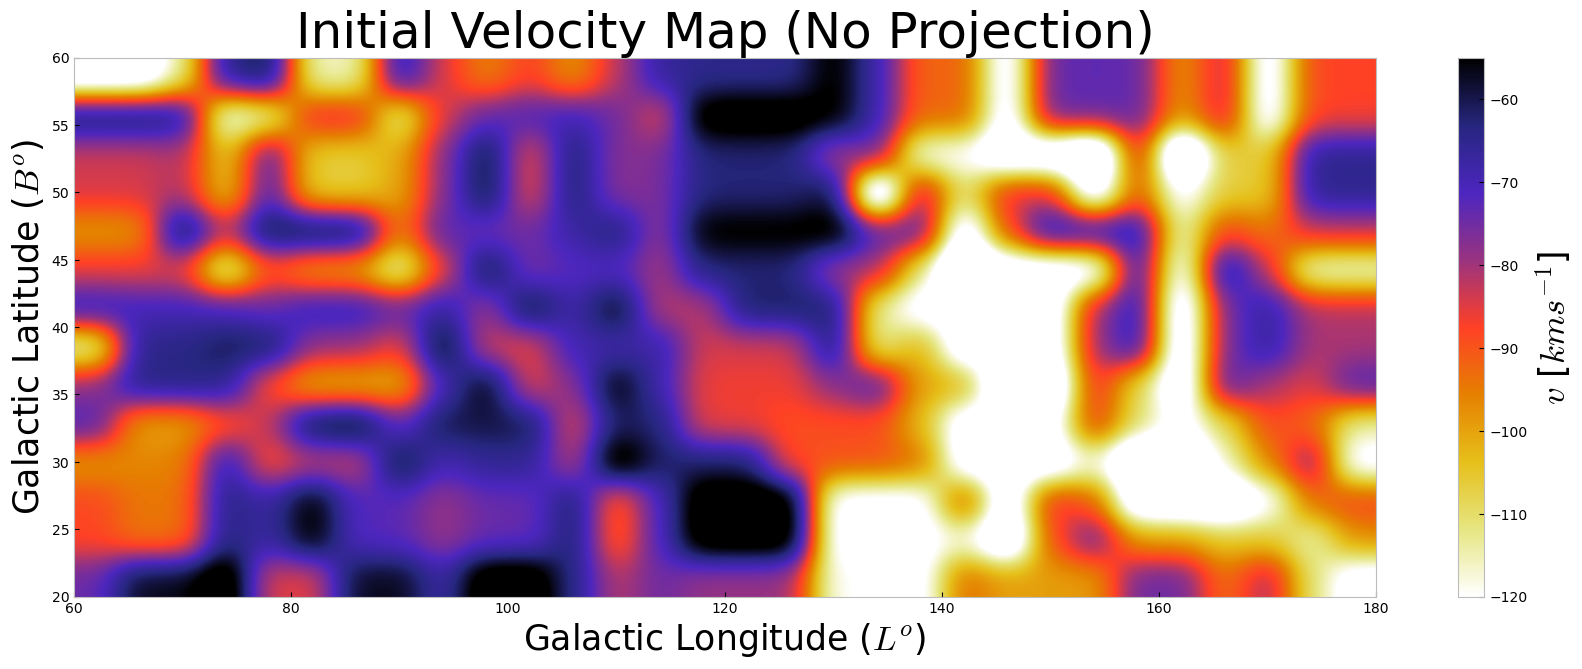

In [ ]:
# colormaps that look good
plt.figure(figsize = (21, 7))
plt.imshow(matrix, cmap = 'CMRmap_r', interpolation= 'gaussian', 
           aspect = 'auto', origin = 'lower', extent=[60, 180, 20, 60], 
           vmin=-120, vmax = -55)
cbar = plt.colorbar()
cbar.set_label(r'$v$ [$kms^{-1}$]', rotation=90, fontsize = 25)
plt.xlabel('Galactic Longitude ($L^{o}$)', fontsize = 25)
plt.ylabel('Galactic Latitude ($B^{o}$)', fontsize = 25)
plt.title('Initial Velocity Map (No Projection)', fontsize=36)
plt.grid(False)

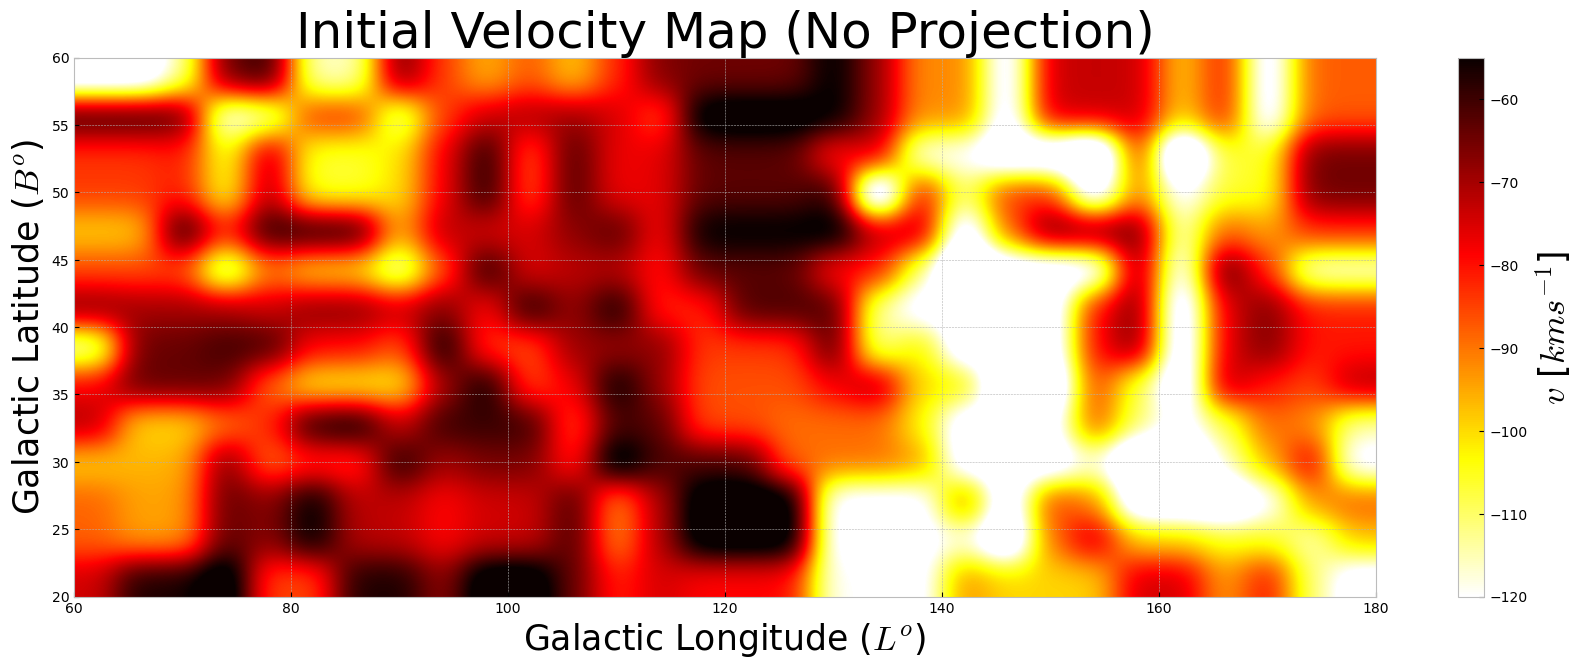

In [ ]:
# colormaps that look good
plt.figure(figsize = (21, 7))
plt.imshow(matrix, cmap = 'hot_r', interpolation= 'gaussian', 
           aspect = 'auto', origin = 'lower', extent=[60, 180, 20, 60], 
           vmin=-120, vmax = -55)
cbar = plt.colorbar()
cbar.set_label(r'$v$ [$kms^{-1}$]', rotation=90, fontsize = 25)
plt.xlabel('Galactic Longitude ($L^{o}$)', fontsize = 25)
plt.ylabel('Galactic Latitude ($B^{o}$)', fontsize = 25)
plt.title('Initial Velocity Map (No Projection)', fontsize=36)
plt.grid(True, lw=0.4, which = 'major')

#plt.savefig('v_map_initial_long.png')

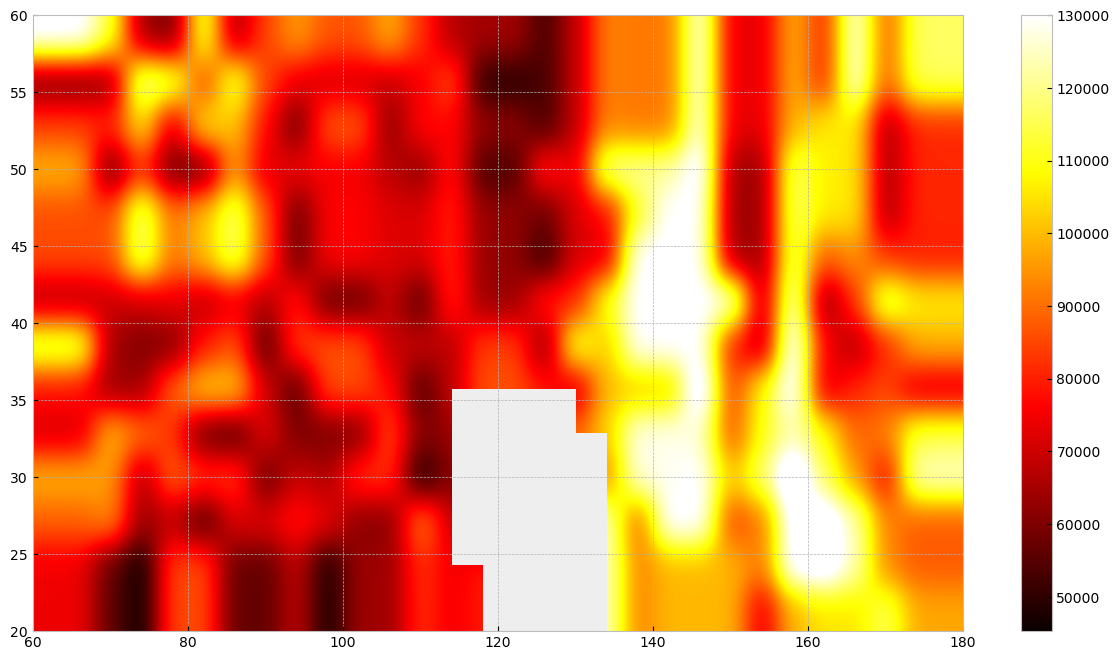

In [ ]:
plt.figure(figsize = (15, 8))
plt.imshow(matrix2, cmap = 'hot', interpolation= 'gaussian', 
           aspect = 'auto', origin = 'lower', extent=[60, 180, 20, 60], 
           vmin=min(velocity_reversed), vmax = 130000)
cbar = plt.colorbar()

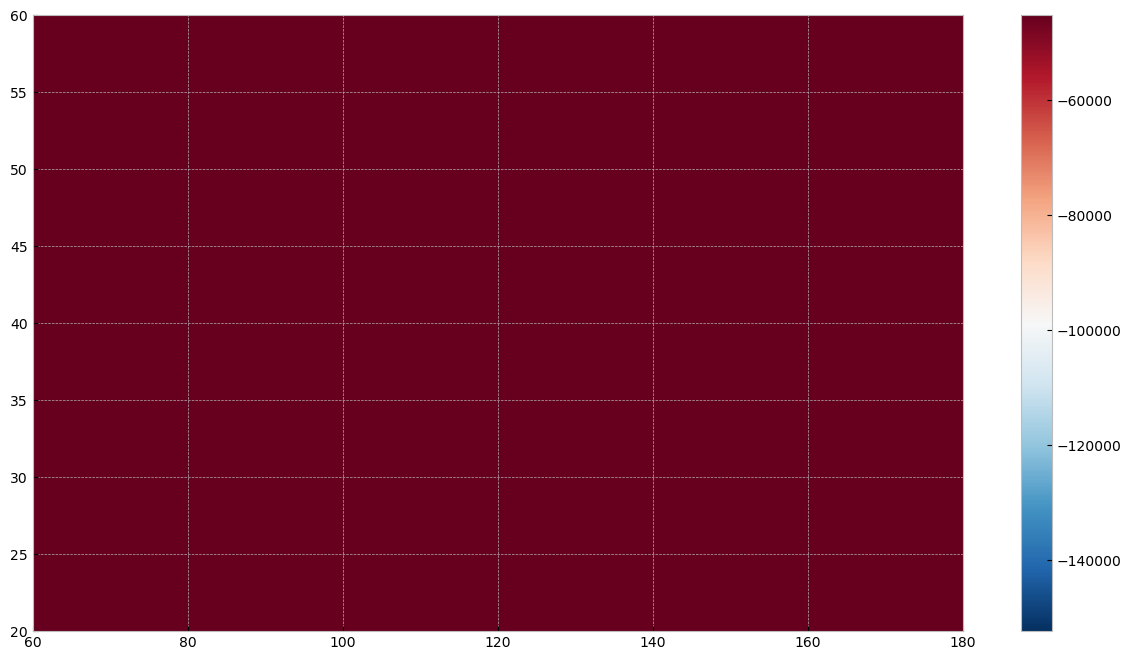

In [ ]:
plt.figure(figsize = (15, 8))
plt.imshow(matrix, cmap = 'RdBu_r', interpolation= 'gaussian', aspect = 'auto', origin = 'lower', extent=[60, 180, 20, 60], vmin=np.amin(velocity_peak), vmax=np.amax(velocity_peak))
cbar = plt.colorbar()

In [ ]:
coordinates

[array([292.        ,  60.        ,  20.        , 275.4099465 ,
         32.44704574,   0.        ]),
 array([286.        ,  60.        ,  23.4       , 271.57775805,
         33.55743569,   1.        ]),
 array([277.        ,  60.        ,  26.8       , 267.65132672,
         34.54681459,   2.        ]),
 array([270.        ,  60.        ,  30.2       , 263.63668267,
         35.40764193,   3.        ]),
 array([261.        ,  60.        ,  33.6       , 259.54231204,
         36.13293453,   4.        ]),
 array([252.        ,  60.        ,  37.        , 255.37913878,
         36.71647848,   5.        ]),
 array([244.        ,  60.        ,  40.4       , 251.16036252,
         37.15303984,   6.        ]),
 array([236.        ,  60.        ,  43.8       , 246.90114155,
         37.43855861,   7.        ]),
 array([229.        ,  60.        ,  47.2       , 242.61812746,
         37.5703098 ,   8.        ]),
 array([221.        ,  60.        ,  50.6       , 238.32887769,
         37.547016

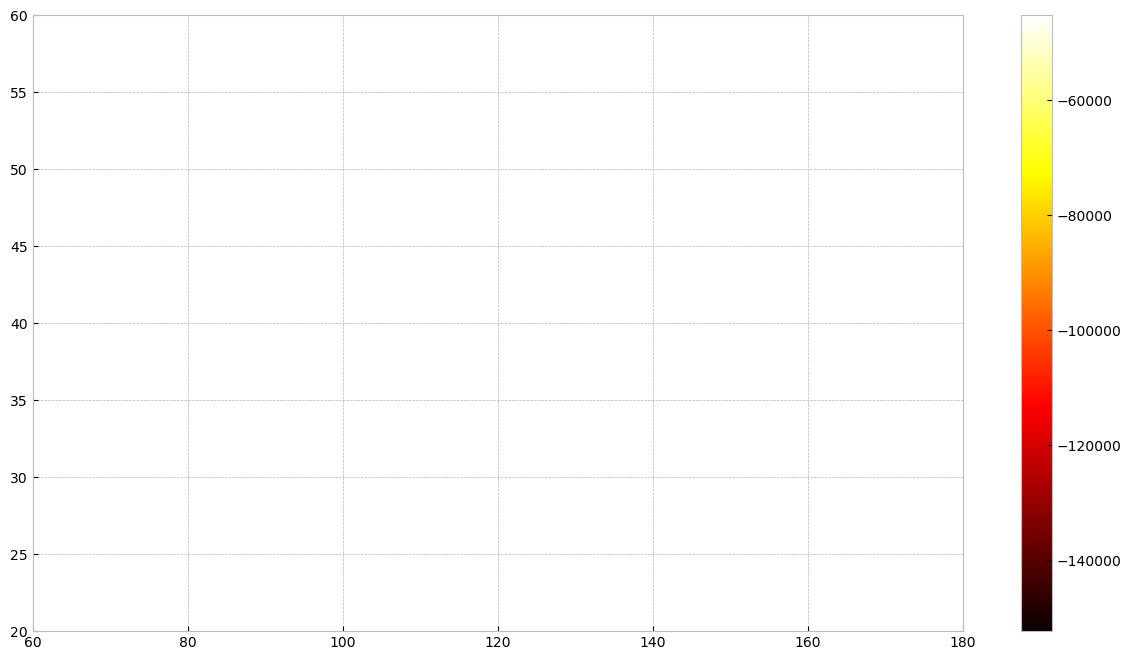

In [ ]:
plt.figure(figsize = (15, 8))
plt.imshow(matrix, cmap = 'hot', interpolation= 'gaussian', aspect = 'auto', origin = 'lower', extent=[60, 180, 20, 60], vmin=np.amin(velocity_peak), vmax=np.amax(velocity_peak))
cbar = plt.colorbar()

In [ ]:
# for choosing nearest in better way (NOT FORMATTED YET)

# Matrix for the data
matrix1 = np.zeros((26, 31))  # Notice rows x cols are flipped for plotting with contourf

# Prepare coordinate pairs
coord = list(zip(longitudes, latitudes))
lb_val = list(zip(np.repeat(ref_longitudes, 26), np.tile(ref_latitudes, 31)))
indexes = list(zip(np.tile(col_indices, 31), np.repeat(row_indices, 26)))

# Efficient nearest index finding
def find_nearest_indices(lb_val, coord):
    lb_array = np.array(lb_val)
    coord_array = np.array(coord)
    nearest_indices = []
    for l, b in coord_array:
        distances = np.sqrt((lb_array[:, 0] - l)**2 + (lb_array[:, 1] - b)**2)
        nearest_indices.append(np.argmin(distances))
    return nearest_indices

nearest_indices = find_nearest_indices(lb_val, coord)

# Populate the matrix using precomputed nearest indices
for i, idx in enumerate(nearest_indices):
    matrix_index = indexes[idx]
    matrix1[matrix_index[1], matrix_index[0]] = velocities[i]  # Notice the reversed indexing for rows/cols

NameError: name 'ref_longitudes' is not defined

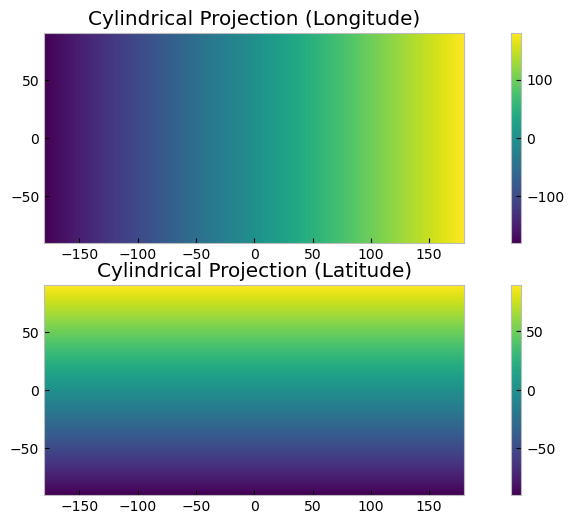

In [ ]:
NLON,NLAT = 1000, 500 # the number of pixels in longitude and latitude
xs,ys = np.indices((NLAT,NLON)) # get the array indices for each pixel
lats = (xs - NLAT/2) * 180 / NLAT # scale [0:NLAT) to [-90:90)
lons = (ys - NLON/2) * 360 / NLON # scale [0:NLON) to [-180:180)

plt.figure(figsize=(12,6))
plt.subplot(211)

plt.title('Cylindrical Projection (Longitude)')
plt.imshow(lons, origin='lower', extent=(-180,180,-90,90))
plt.grid()
plt.colorbar()

plt.subplot(212)
plt.title('Cylindrical Projection (Latitude)')
plt.imshow(lats, origin='lower', extent=(-180,180,-90,90))
plt.grid()
plt.colorbar()
plt.show()

In [ ]:
from scipy.signal import find_peaks

#MAKING A MATRIX
matrix = np.zeros((14, 30, 3), dtype = int)

#r_img = img[:,:,0]
#g_img = img[:,:,1]
#b_img = img[:,:,2]

N = 0


for i in range(len(velocity_peak)):
    
    l = float(galactic[i][0])
    b = float(galactic[i][1])

    for m in range(len(lb_val)):
        
        def find_nearest(array, value):
            array = np.asarray(array)
            idx = (np.abs(array - value)).argmin()
            return idx
        
        if l == lb_val[m][0] and b == lb_val[m][1]:
            #GETS THE INDEXES
            row_index = indexes[m][0]
            column_index = indexes[m][1]

        #GETTING THE CORRESPONDING VELOCITY
            dop = velocity_peak[i]

            #IF NEGATIVE GO TO THIS CODE BLOCK
            if dop < 0:
                #MAKING A LIST OF INTEGERS FOR COLOR MAPPING
                val = list(reversed(np.arange(0, 70, 1)))

                #THE VELOCITY MAP
                mapp = np.linspace(np.amin(velocity_peak), 0, 70)
                
                #GETTING INDEX TO WHERE THE MAPP AND VALUE ARE THE CLOSEST
                indx = find_nearest(mapp, dop)
                
                #GETTING THE CORRESPONDING VALUE FOR THE COLOR
                color = val[indx]
                
                #APPENDING THAT TO THE RED PART OF THE MATRIX
                matrix[row_index, column_index, 0] = int(color)

            #IF POSITIVE VELOCITY
            if dop > 0:
                
                #SAME DEAL AS BEFORE BUT NOW WITH POSITIVE MAPPING
                val = np.arange(0, 243, 1)
                mapp = np.linspace(0, np.amax(velocity_peak), 243)
                
                indx = find_nearest(mapp, dop)
                
                color = val[indx]

                matrix[row_index, column_index, 2] = int(color)  

In [ ]:
# getting the peaks 
# NOTE: this will work the same once we get temperature
# in reality we will be passing calibrated T-line spectra through this
peaks_array = []
velocity_array = []
for i in range(len(chunked0)):
    peaks_indices, _ = find_peaks(chunked0[i]) # get indices of the peaks 
    peak_values_pre = [] # make empty array for storing peak values in nested loop
    for j in range(len(peaks_indices)):
        indiv_peaks = chunked0[i][peaks_indices[j]] # grab peak value at index of the individual spectra
        peak_values_pre.append(indiv_peaks) # append the peak value to a list of peak values for THAT spectra
    peak_max = max(peak_values_pre) # take the max of the peak values array, THAT'S the MAIN HI peak for that spectra
    peaks_array.append(peak_max)

print('min peak = ' + str(np.min(peaks_array)))
print('max peak = ' + str(np.max(peaks_array)))
peaks_array

min peak = 1.0495307805609329
max peak = 1.5510222499738038


[1.1147119458822716,
 1.116489816127032,
 1.1087985501086295,
 1.0786184456873376,
 1.0633251285411511,
 1.10999793162621,
 1.0758587537280717,
 1.128257322845254,
 1.1299847713683735,
 1.1201707244478876,
 1.1319045801103667,
 1.1189263697685328,
 1.1043863192928116,
 1.1059362814156468,
 1.1189904807184614,
 1.0986568273559818,
 1.1209306415448832,
 1.1246584308143377,
 1.090797966343691,
 1.0689351488816117,
 1.1093130805086076,
 1.1244978097811456,
 1.1120299382910084,
 1.0715208399547806,
 1.1174662787831804,
 1.1153426069511192,
 1.1036825149350968,
 1.1147724131877752,
 1.080294649667128,
 1.1062714506748386,
 1.0675155176879616,
 1.0684259985992388,
 1.1065083134479516,
 1.1029551993762998,
 1.0983857872802905,
 1.0835201401435068,
 1.1059239368360443,
 1.10577546970562,
 1.0802276032110243,
 1.1096633454574325,
 1.099428033688022,
 1.0949614020723786,
 1.0728321237750522,
 1.1079428019893516,
 1.1036589410758897,
 1.098702736343307,
 1.0918888746986524,
 1.10674023760346,
 1.1

In [ ]:
# getting the peaks 
# NOTE: this will work the same once we get temperature
# in reality we will be passing calibrated T-line spectra through this
peaks_array = []
velocity_array = []
for i in range(len(chunked0)):
    peaks_indices, _ = find_peaks(chunked0[i]) # get indices of the peaks 
    peak_values_pre = [] # make empty array for storing peak values in nested loop
    for j in range(len(peaks_indices)):
        indiv_peaks = chunked0[i][peaks_indices[j]] # grab peak value at index of the individual spectra
        peak_values_pre.append(indiv_peaks) # append the peak value to a list of peak values for THAT spectra
    peak_max = max(peak_values_pre) # take the max of the peak values array, THAT'S the MAIN HI peak for that spectra
    peaks_array.append(peak_max)

print('min peak = ' + str(np.min(peaks_array)))
print('max peak = ' + str(np.max(peaks_array)))
peaks_array

min peak = 1.0495307805609329
max peak = 1.5510222499738038


[1.1147119458822716,
 1.116489816127032,
 1.1087985501086295,
 1.0786184456873376,
 1.0633251285411511,
 1.10999793162621,
 1.0758587537280717,
 1.128257322845254,
 1.1299847713683735,
 1.1201707244478876,
 1.1319045801103667,
 1.1189263697685328,
 1.1043863192928116,
 1.1059362814156468,
 1.1189904807184614,
 1.0986568273559818,
 1.1209306415448832,
 1.1246584308143377,
 1.090797966343691,
 1.0689351488816117,
 1.1093130805086076,
 1.1244978097811456,
 1.1120299382910084,
 1.0715208399547806,
 1.1174662787831804,
 1.1153426069511192,
 1.1036825149350968,
 1.1147724131877752,
 1.080294649667128,
 1.1062714506748386,
 1.0675155176879616,
 1.0684259985992388,
 1.1065083134479516,
 1.1029551993762998,
 1.0983857872802905,
 1.0835201401435068,
 1.1059239368360443,
 1.10577546970562,
 1.0802276032110243,
 1.1096633454574325,
 1.099428033688022,
 1.0949614020723786,
 1.0728321237750522,
 1.1079428019893516,
 1.1036589410758897,
 1.098702736343307,
 1.0918888746986524,
 1.10674023760346,
 1.1

In [ ]:
# because of how data was collected, the galactic coordinates are saved in the object "galactic"
print(len(galactic))
galactic
# and thankfully, because of the beginning, they are ordered exactly 
# the same as the spectra! 

313


[(179.59999999999985, 53.99999999999999),
 (161.19999999999987, 50.59999999999999),
 (174.99999999999986, 53.99999999999999),
 (133.5999999999999, 36.99999999999999),
 (138.1999999999999, 40.39999999999999),
 (170.39999999999986, 53.99999999999999),
 (142.7999999999999, 43.79999999999999),
 (156.59999999999988, 50.59999999999999),
 (165.79999999999987, 53.99999999999999),
 (138.1999999999999, 23.4),
 (147.3999999999999, 47.19999999999999),
 (179.59999999999985, 57.399999999999984),
 (161.19999999999987, 53.99999999999999),
 (174.99999999999986, 57.399999999999984),
 (151.9999999999999, 50.59999999999999),
 (170.39999999999986, 57.399999999999984),
 (156.59999999999988, 53.99999999999999),
 (165.79999999999987, 57.399999999999984),
 (142.7999999999999, 47.19999999999999),
 (138.1999999999999, 43.79999999999999),
 (151.9999999999999, 20.0),
 (147.3999999999999, 50.59999999999999),
 (161.19999999999987, 57.399999999999984),
 (133.5999999999999, 40.39999999999999),
 (151.9999999999999, 53.

In [ ]:
# so make combined array pulling peak value and assigning to coordinates

combined_array = []
for i in range(len(galactic)):
    combined = [galactic[i], peaks_array[i]]
    combined_array.append(combined)
    
    
combined_array

[[(179.59999999999985, 53.99999999999999), 1.1147119458822716],
 [(161.19999999999987, 50.59999999999999), 1.116489816127032],
 [(174.99999999999986, 53.99999999999999), 1.1087985501086295],
 [(133.5999999999999, 36.99999999999999), 1.0786184456873376],
 [(138.1999999999999, 40.39999999999999), 1.0633251285411511],
 [(170.39999999999986, 53.99999999999999), 1.10999793162621],
 [(142.7999999999999, 43.79999999999999), 1.0758587537280717],
 [(156.59999999999988, 50.59999999999999), 1.128257322845254],
 [(165.79999999999987, 53.99999999999999), 1.1299847713683735],
 [(138.1999999999999, 23.4), 1.1201707244478876],
 [(147.3999999999999, 47.19999999999999), 1.1319045801103667],
 [(179.59999999999985, 57.399999999999984), 1.1189263697685328],
 [(161.19999999999987, 53.99999999999999), 1.1043863192928116],
 [(174.99999999999986, 57.399999999999984), 1.1059362814156468],
 [(151.9999999999999, 50.59999999999999), 1.1189904807184614],
 [(170.39999999999986, 57.399999999999984), 1.098656827355981